<a href="https://colab.research.google.com/github/dpakkaushik/Office_Reports/blob/main/Pallia_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas              as pd
#import inflection
import math
import numpy               as np
import seaborn             as sns
import matplotlib.pyplot   as plt
import datetime
import xgboost             as xgb
import pickle
import json
import requests
import regex               as re
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble      import RandomForestRegressor
from sklearn.metrics       import mean_absolute_error, mean_squared_error
from sklearn.linear_model  import LinearRegression, Lasso


#from boruta                import BorutaPy
from IPython.display       import Image
from IPython.core.display  import HTML
from tabulate              import tabulate
from scipy                 import stats

In [ ]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

#Display all columns
# Set Pandas display options
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns


# Function to clean the route name
def clean_route_name(text):
    if pd.isnull(text):
        return text  # If NaN, return NaN
    else:
        # Remove special characters except commas and convert to uppercase
        cleaned_text = re.sub(r'[^a-zA-Z0-9,\s]', '', text).upper()
        # Remove leading, lagging, and in-between spaces
        cleaned_text = ' '.join(cleaned_text.split())
        return cleaned_text


**DATA MIS REPORT**

In [ ]:
path = "/content/drive/MyDrive/Pallia_Data/"

df_TMS = pd.read_csv(path+"TMS_Combined_drive.csv")
print(df_TMS.shape)
df_TMS.head(1)

(16030, 33)


sr. no.   month  settlement_id vehicle_no ownership            brand  \
0        1  Jan-23  110HR38V29991  HR38V2999     Hired  TATA Motors Ltd   

  body_type  year      branch                     customer           driver  \
0       TOT  2015  Carterpuri  Reliance Industries Limited  Ram Ashis Yadav   

  driver_id                                              route  \
0     NO_ID  Hoskote- R N E - Moti Khavadi Via Elecronic Ci...   

            from  from_zone            to to_zone      start_date  \
0  Hoskote- R N E     South  Moti Khavadi    West  22-12-22 10:05   

         end_date  load_km  empty_km  income  vehicle_freight  hire_charges  \
0  01-01-23 10:10     1870         0  192500           192500        155000   

   fuel_exp  cash_exp  fasttag  driver_salary  fooding  maintenance  tyre  \
0     56070         0        0              0        0            0     0   

   battery  document  
0        0         0

In [ ]:
#Number of NA/ Blanks in each column
df_TMS.isna().sum()

sr. no.              0
month                0
settlement_id      237
vehicle_no           0
ownership            0
brand                1
body_type            7
year                 0
branch             237
customer           305
driver             240
driver_id          240
route              237
from               237
from_zone          237
to                 237
to_zone            237
start_date         237
end_date           237
load_km              0
empty_km             0
income               0
vehicle_freight      0
hire_charges         0
fuel_exp             0
cash_exp             0
fasttag              0
driver_salary        0
fooding              0
maintenance          0
tyre                 0
battery              0
document             0
dtype: int64

In [ ]:
df_TMS[df_TMS.driver_id.isna()][['driver','driver_id']].head(500)

driver driver_id
1420     NaN       NaN
1421     NaN       NaN
1422     NaN       NaN
1423     NaN       NaN
1424     NaN       NaN
1425     NaN       NaN
1426     NaN       NaN
1427     NaN       NaN
1428     NaN       NaN
1429     NaN       NaN
1430     NaN       NaN
1431     NaN       NaN
1432     NaN       NaN
1433     NaN       NaN
1434     NaN       NaN
1435     NaN       NaN
1436     NaN       NaN
1437     NaN       NaN
1438     NaN       NaN
1439     NaN       NaN
1440     NaN       NaN
3035     NaN       NaN
3036     NaN       NaN
3037     NaN       NaN
3038     NaN       NaN
3039     NaN       NaN
3040     NaN       NaN
3041     NaN       NaN
3042     NaN       NaN
3043     NaN       NaN
3044     NaN       NaN
3045     NaN       NaN
3046     NaN       NaN
3047     NaN       NaN
3048     NaN       NaN
3049     NaN       NaN
3050     NaN       NaN
3051     NaN       NaN
3052     NaN       NaN
3053     NaN       NaN
3054     NaN       NaN
3055     NaN       NaN
3056     NaN       NaN
3611     NaN       NaN
4631     NaN       NaN
4632     NaN       NaN
6041     NaN       NaN
6042     NaN       NaN
6043     NaN       NaN
6044     NaN       NaN
6045     NaN       NaN
6046     NaN       NaN
6047     NaN       NaN
6048     NaN       NaN
6049     NaN       NaN
6050     NaN       NaN
6051     NaN       NaN
6052     NaN       NaN
6053     NaN       NaN
6054     NaN       NaN
6055     NaN       NaN
6056     NaN       NaN
6057     NaN       NaN
6058     NaN       NaN
6059     NaN       NaN
6060     NaN       NaN
6061     NaN       NaN
6062     NaN       NaN
6063     NaN       NaN
6064     NaN       NaN
6065     NaN       NaN
6066     NaN       NaN
6067     NaN       NaN
6068     NaN       NaN
6069     NaN       NaN
6070     NaN       NaN
6071     NaN       NaN
6072     NaN       NaN
6073     NaN       NaN
6074     NaN       NaN
6075     NaN       NaN
6076     NaN       NaN
6077     NaN       NaN
6078     NaN       NaN
6079     NaN       NaN
6080     NaN       NaN
6081     NaN       NaN
6082     NaN       NaN
6083     NaN       NaN
6084     NaN       NaN
6085     NaN       NaN
6086     NaN       NaN
6087     NaN       NaN
6088     NaN       NaN
6089     NaN       NaN
6090     NaN       NaN
6582     NaN       NaN
7459     NaN       NaN
7460     NaN       NaN
7461     NaN       NaN
7462     NaN       NaN
7463     NaN       NaN
7464     NaN       NaN
7465     NaN       NaN
7466     NaN       NaN
7467     NaN       NaN
7468     NaN       NaN
7469     NaN       NaN
7470     NaN       NaN
7471     NaN       NaN
7472     NaN       NaN
7473     NaN       NaN
7474     NaN       NaN
7475     NaN       NaN
7476     NaN       NaN
7477     NaN       NaN
7478     NaN       NaN
7479     NaN       NaN
7480     NaN       NaN
7481     NaN       NaN
7482     NaN       NaN
7483     NaN       NaN
7484     NaN       NaN
7485     NaN       NaN
7486     NaN       NaN
7487     NaN       NaN
7488     NaN       NaN
7489     NaN       NaN
7490     NaN       NaN
7491     NaN       NaN
7492     NaN       NaN
7493     NaN       NaN
7494     NaN       NaN
7495     NaN       NaN
7496     NaN       NaN
7497     NaN       NaN
7498     NaN       NaN
7499     NaN       NaN
7500     NaN       NaN
7501     NaN       NaN
7502     NaN       NaN
7503     NaN       NaN
7504     NaN       NaN
7505     NaN       NaN
8915     NaN       NaN
10441    NaN       NaN
10442    NaN       NaN
10443    NaN       NaN
10444    NaN       NaN
12136    NaN       NaN
12137    NaN       NaN
12138    NaN       NaN
12139    NaN       NaN
12140    NaN       NaN
12141    NaN       NaN
12142    NaN       NaN
12143    NaN       NaN
12144    NaN       NaN
12145    NaN       NaN
12146    NaN       NaN
12147    NaN       NaN
12148    NaN       NaN
12149    NaN       NaN
12150    NaN       NaN
12151    NaN       NaN
12152    NaN       NaN
12153    NaN       NaN
12154    NaN       NaN
12155    NaN       NaN
12156    NaN       NaN
13953    NaN       NaN
13954    NaN       NaN
13955    NaN       NaN
1395

In [ ]:
df_TMS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16030 entries, 0 to 16029
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sr. no.          16030 non-null  int64 
 1   month            16030 non-null  object
 2   settlement_id    15793 non-null  object
 3   vehicle_no       16030 non-null  object
 4   ownership        16030 non-null  object
 5   brand            16029 non-null  object
 6   body_type        16023 non-null  object
 7   year             16030 non-null  int64 
 8   branch           15793 non-null  object
 9   customer         15725 non-null  object
 10  driver           15790 non-null  object
 11  driver_id        15790 non-null  object
 12  route            15793 non-null  object
 13  from             15793 non-null  object
 14  from_zone        15793 non-null  object
 15  to               15793 non-null  object
 16  to_zone          15793 non-null  object
 17  start_date       15793 non-null

#### **DATA CLEANING**

In [ ]:
#Droping column sr. no.
df_TMS.drop('sr. no.', axis=1, inplace=True)

In [ ]:
# from column month create two new columns report_month and report_year
df_TMS['report_month'] = df_TMS['month'].str.split('-').str[0]
df_TMS['report_year'] = df_TMS['month'].str.split('-').str[1]
#droping column month
df_TMS.drop('month', axis=1, inplace=True)

In [ ]:
# prompt: convert start_date and end_date columns in date time format. mention time as well

df_TMS.start_date = pd.to_datetime(df_TMS['start_date'], format = '%d-%m-%y %H:%M')
df_TMS.end_date = pd.to_datetime(df_TMS['end_date'], format = '%d-%m-%y %H:%M' )

# create start_month and end_month columns
df_TMS['start_month'] = df_TMS['start_date'].dt.month
df_TMS['end_month'] = df_TMS['end_date'].dt.month

In [ ]:
# create week_of_month column

### creating Week of month (first day start as first week counts 28 and remaining days goes to week 5)
df_TMS['week_of_month_sd'] = df_TMS['start_date'].dt.day.apply(lambda x: (x - 1) // 7 + 1)


In [ ]:
#rename columns
df_TMS.rename(columns={'year': 'vehicle_year'}, inplace=True)
df_TMS.rename(columns={'driver_salary': 'driver_salary_mis'}, inplace=True)
df_TMS.rename(columns={'fooding': 'fooding_mis'}, inplace=True)
df_TMS.rename(columns={'maintenance': 'maintenance_mis'}, inplace=True)
df_TMS.rename(columns={'tyre': 'tyre_mis'}, inplace=True)
df_TMS.rename(columns={'battery': 'battery_mis'}, inplace=True)
df_TMS.rename(columns={'document': 'document_mis'}, inplace=True)

In [ ]:
# Creating route_new column by combining from & to columns
df_TMS = df_TMS.rename(columns={ 'from ':'from' })
df_TMS['from'] = df_TMS['from'].str.upper()
df_TMS['to'] = df_TMS['to'].str.upper()
df_TMS['route_new'] = df_TMS['from'].str.cat(df_TMS['to'], sep='-')

In [ ]:
# Cleaning route column making everything in capitals letters and removing and leading lagging or in between extra spaces
# Applying the function to create a new column 'Cleaned_Route_Name'
df_TMS['route_cleaned'] = df_TMS['route'].apply(clean_route_name)

**DATA TRANSFORMATION**

In [ ]:
#Creating column total_km
df_TMS['total_km'] = df_TMS["load_km"] + df_TMS["empty_km"]

In [ ]:
### Creating new column duration (End_Date - Start_Date  )
df_TMS['duration'] = (df_TMS["end_date"] - df_TMS["start_date"])

In [ ]:
# Counting trip hours
df_TMS['trip_hours'] = (df_TMS['end_date'] - df_TMS['start_date']).dt.total_seconds() / 3600
#Converting trip hours in days -- divindg by 24
df_TMS['trip_hour_days'] = round(df_TMS['trip_hours'] / 24, 2)
# where round_off value is less than 1 converting it to 1..and for rest of all values rounding off to nearest integer
df_TMS['trip_hour_days_roundoff'] = df_TMS['trip_hour_days'].apply(lambda x: 1 if pd.isna(x) or x < 1 else round(x))

In [ ]:
df_TMS[['end_date','start_date','duration','trip_hours','trip_hour_days','trip_hour_days_roundoff']].head(10)

end_date          start_date         duration  trip_hours  \
0 2023-01-01 10:10:00 2022-12-22 10:05:00 10 days 00:05:00  240.083333   
1 2023-01-04 19:55:00 2022-12-22 21:00:00 12 days 22:55:00  310.916667   
2 2023-01-01 19:20:00 2022-12-23 10:40:00  9 days 08:40:00  224.666667   
3 2023-01-03 15:00:00 2022-12-23 23:30:00 10 days 15:30:00  255.500000   
4 2023-01-01 23:00:00 2022-12-24 15:35:00  8 days 07:25:00  199.416667   
5 2023-01-02 15:00:00 2022-12-24 19:15:00  8 days 19:45:00  211.750000   
6 2023-01-02 11:30:00 2022-12-24 22:00:00  8 days 13:30:00  205.500000   
7 2023-01-01 14:00:00 2022-12-25 13:15:00  7 days 00:45:00  168.750000   
8 2023-01-02 11:30:00 2022-12-25 16:45:00  7 days 18:45:00  186.750000   
9 2023-01-05 17:35:00 2022-12-26 01:05:00 10 days 16:30:00  256.500000   

   trip_hour_days  trip_hour_days_roundoff  
0           10.00                       10  
1           12.95                       13  
2            9.36                        9  
3           10.65                       11  
4            8.31                        8  
5            8.82                        9  
6            8.56                        9  
7            7.03                        7  
8            7.78                        8  
9           10.69                       11

In [ ]:
## drop columns 'duration','trip_hours','trip_hour_days'
df_TMS.drop(['duration', 'trip_hours', 'trip_hour_days'], axis=1, inplace=True)

#### **HIRED VEHICLES**

In [ ]:
df_TMS.ownership.value_counts()

Owned    15860
Hired      170
Name: ownership, dtype: int64

In [ ]:
df_owned = df_TMS[df_TMS.ownership == "Owned"]
df1 = df_TMS[df_TMS.ownership == "Owned"]
print(df1.shape)

(15860, 40)


In [ ]:
df_hired = df_TMS[df_TMS.ownership == "Hired"]
print(df_hired.shape)

(170, 40)


 **Number of trips by Hired Vehicles**

In [ ]:
print("Total number of hired trips : ",df_hired["settlement_id"].count())

Total number of hired trips :  170


**Overall Revenue by Hired Vehicles**


In [ ]:
print(df_hired['income'].sum(),"INR")

17171099 INR


 **Branch wise number of trips and revenue by hired vehicles**

**INSIGHT : Hosur branch hired most number of vehicles**


In [ ]:
df_hired.groupby("branch").agg(trip_count = ('settlement_id', 'count'), Revenue = ('income' , "sum")).reset_index()

branch  trip_count   Revenue
0   Carterpuri          48   5245211
1  Head Office           4    389530
2        Hosur         108  11010324
3   Ranjangaon           7    125512
4       Sanand           3    400522

**Month wise revenue by hired vehicles**

**INSIGHT : At the beginning of the year most number of vehicles were hired**

In [ ]:
df_hired.groupby("start_month").agg(trip_count = ('settlement_id', 'count'), Revenue = ('income' , "sum")).reset_index().sort_values(by = "Revenue", ascending = False)

start_month  trip_count  Revenue
2           3.0          36  4077864
1           2.0          27  2744329
0           1.0          20  2263679
6           7.0          13  1324462
8           9.0          15  1313718
9          10.0          10  1096262
7           8.0          12   997235
4           5.0          11   896344
3           4.0          10   864956
10         12.0           7   834640
5           6.0           9   757610

**Margin for Hired**

In [ ]:
# create a new column hired_vehicle_expense by adding columns hire_charges, cash_exp, fasttag, document_mis , driver_salary_mis,fooding_mis, maintenance_mis, tyre_mis, battery_mis, document_mis

df_hired['hired_vehicle_expense'] = (df_hired['hire_charges'] + df_hired['cash_exp'] + df_hired['fasttag'] + df_hired['document_mis'] + df_hired['driver_salary_mis'] + df_hired['fooding_mis'] + df_hired['maintenance_mis'] + df_hired['tyre_mis'] + df_hired['battery_mis'] + df_hired['document_mis'])

df_hired['margin'] = df_hired['income'] - df_hired['hired_vehicle_expense']
print("Gross margin for hired vehicles is : ",df_hired['margin'].sum(),"INR")
print("Gross margin for hired vehicles is : ",(round(df_hired['margin'].sum()/df_hired['income'].sum(),2))*100,"%")

Gross margin for hired vehicles is :  1720781 INR
Gross margin for hired vehicles is :  10.0 %


**Margin percentage by each branch**

In [ ]:
df_hired["margin_percentage"] = round((df_hired["margin"] / df_hired["income"])*100,2)
df_hired["expense_percentage"] = round((df_hired["hired_vehicle_expense"] / df_hired["income"])*100,2)
df_hired.groupby('branch').agg(Trips = ('branch','count'),Avg_margin = ("margin_percentage","mean"), Margin_In_Rs = ("margin","sum")).reset_index()

branch  Trips  Avg_margin  Margin_In_Rs
0   Carterpuri     48   18.891458       1011479
1  Head Office      4   21.387500         73530
2        Hosur    108    5.156574        556068
3   Ranjangaon      7   35.880000         15352
4       Sanand      3   17.810000         64352

## **OWNED VEHICLES**

#### **474 enteries with zero income**

In [ ]:
df1[df1.income == 0].shape

(474, 40)

 **Out of those 237 has No Movement i.e Load & Empty KMs are zero**

In [ ]:
#### Where there is no start date that means there is no trips -- It is just data for vehicles which werent used for any trip during that month but has expenses
#### Against them (Driver Salary / Fooding / Maintenance / Tyre)
print("Number of such trips :",df1[(df1.income == 0) & (df1.start_date.isna())].shape[0])
df1[(df1.income == 0) & (df1.start_date.isna())].head(5)

Number of such trips : 237


settlement_id  vehicle_no ownership            brand body_type  \
1420           NaN   HR55R5804     Owned  TATA Motors Ltd      TR08   
1421           NaN  NL01AG4716     Owned  TATA Motors Ltd      TR08   
1422           NaN  NL01AG4856     Owned  TATA Motors Ltd      TR08   
1423           NaN  NL01AG4857     Owned  TATA Motors Ltd      TR08   
1424           NaN  NL01AG4858     Owned  TATA Motors Ltd      TR08   

      vehicle_year branch customer driver driver_id route from from_zone   to  \
1420          2012    NaN      NaN    NaN       NaN   NaN  NaN       NaN  NaN   
1421          2012    NaN      NaN    NaN       NaN   NaN  NaN       NaN  NaN   
1422          2023    NaN      NaN    NaN       NaN   NaN  NaN       NaN  NaN   
1423          2023    NaN      NaN    NaN       NaN   NaN  NaN       NaN  NaN   
1424          2023    NaN      NaN    NaN       NaN   NaN  NaN       NaN  NaN   

     to_zone start_date end_date  load_km  empty_km  income  vehicle_freight  \
1420     NaN        NaT      NaT        0         0       0                0   
1421     NaN        NaT      NaT        0         0       0                0   
1422     NaN        NaT      NaT        0         0       0                0   
1423     NaN        NaT      NaT        0         0       0                0   
1424     NaN        NaT      NaT        0         0       0                0   

      hire_charges  fuel_exp  cash_exp  fasttag  driver_salary_mis  \
1420             0         0         0        0               4823   
1421             0         0         0        0                419   
1422             0         0         0        0               1935   
1423             0         0         0        0               1290   
1424             0         0         0        0                323   

      fooding_mis  maintenance_mis  tyre_mis  battery_mis  document_mis  \
1420            0                0         0            0             0   
1421            0                0         0            0             0   
1422            0                0         0            0             0   
1423            0                0         0            0             0   
1424            0                0         0            0             0   

     report_month report_year  start_month  end_month  week_of_month_sd  \
1420          Jan          23          NaN        NaN               NaN   
1421          Jan          23          NaN        NaN               NaN   
1422          Jan          23          NaN        NaN               NaN   
1423          Jan          23          NaN        NaN               NaN   
1424          Jan          23          NaN        NaN               NaN   

     route_new route_cleaned  total_km  trip_hour_days_roundoff  
1420       NaN           NaN         0                        1  
1421       NaN           NaN         0                        1  
1422       NaN           NaN         0                        1  
1423       NaN           NaN         0                        1  
1424       NaN           NaN         0                        1

#### **Movement Trips 237**

In [ ]:
print("Number of such trips :",df1[(df1.income == 0) & (df1.start_date.notna())].shape[0])
df1[(df1.income == 0) & (df1.start_date.notna())].head(5)

Number of such trips : 237


settlement_id  vehicle_no ownership            brand body_type  \
1281  SN2223FTS3345  NL01AF7766     Owned  TATA Motors Ltd      TR08   
1403   NO2223FTS180   NL01N4975     Owned  TATA Motors Ltd      TR08   
1404   HR2223FTS627  NL01AE9922     Owned  TATA Motors Ltd      TR08   
1405   RD2223FTS676  NL01AF2232     Owned  TATA Motors Ltd      TR08   
1406   BN2223FTS210  HR55AD6041     Owned  TATA Motors Ltd      TR08   

      vehicle_year   branch                                    customer  \
1281          2012   Sanand  Apl Logistics  Vascor Automotive Pvt. Ltd.   
1403          2016  Manesar               Tata Motors Pv Ltd, Ahmedabad   
1404          2011  Manesar               Tata Motors Pv Ltd, Ahmedabad   
1405          2021  Manesar               Tata Motors Pv Ltd, Ahmedabad   
1406          2018    Hosur               Tata Motors Pv Ltd, Ahmedabad   

                                            driver driver_id  \
1281     Niyaz Ansari S/o Samsuddin Ansari (d2073)     D2073   
1403       Durgesh Kumar S/o Gulab Chandra (d1851)     D1851   
1404  Praveen Kumar S/o Shri Krishna Yadav (d0934)     D0934   
1405       Manoj Kumar S/o Janardan Sharma (d0205)     D0205   
1406        Manjay Yadav S/o Narayan Yadav (d0534)     D0534   

                                                  route     from from_zone  \
1281  Sanand - Kiran Motors Ltd-surat Via Ahmedabad,...   SANAND      West   
1403                  Manesar - Noida Via Kmp, Fatehpur  MANESAR     North   
1404  Manesar - Haridwar Via Kmp, Eastern Peripheral...  MANESAR     North   
1405  Manesar - Pantnagar Via Kmp, Dasna, Moradabad,...  MANESAR     North   
1406     Hosur - Bangalore Via Elecronic City, Attibele    HOSUR     South   

                          to to_zone          start_date            end_date  \
1281  KIRAN MOTORS LTD-SURAT    West 2023-01-27 21:00:00 2023-01-28 15:00:00   
1403                   NOIDA   North 2022-12-30 09:00:00 2023-01-02 09:49:00   
1404                HARIDWAR   North 2022-12-31 13:00:00 2023-01-01 06:00:00   
1405               PANTNAGAR   North 2023-01-01 13:00:00 2023-01-03 20:20:00   
1406               BANGALORE   South 2023-01-01 18:00:00 2023-01-02 15:02:00   

      load_km  empty_km  income  vehicle_freight  hire_charges  fuel_exp  \
1281      300       300       0                0             0     18472   
1403        0       140       0                0             0      3858   
1404        0       330       0                0             0     10050   
1405        0       435       0                0             0     10409   
1406        0        70       0                0             0      1672   

      cash_exp  fasttag  driver_salary_mis  fooding_mis  maintenance_mis  \
1281      1650     3998                  0            0                0   
1403        70     1855                  0            0                0   
1404         0     3055                  0            0                0   
1405       630     5045                  0            0                0   
1406         0     1545                  0            0                0   

      tyre_mis  battery_mis  document_mis report_month report_year  \
1281         0            0             0          Jan          23   
1403         0            0             0          Jan          23   
1404         0            0             0          Jan          23   
1405         0            0             0          Jan          23   
1406         0            0             0          Jan          23   

      start_month  end_month  week_of_month_sd                      route_new  \
1281          1.0        1.0               4.0  SANAND-KIRAN MOTORS LTD-SURAT   
1403         12.0        1.0               5.0                  MANESAR-NOIDA   
1404         12.0        1.0               5.0               MANESAR-HARIDWAR   
1405          1.0        1.0               1.0              MANESAR-PANTNAGAR   
1406          1.0        1.0               1.0 

#### **Empty Movement 231 Trips-- Where load_km are zero**




 * **Reason : Relocation**








In [ ]:
df_empty = df1[(df_TMS.income == 0) & (df1.start_date.notna()) & (df1.load_km == 0)]
print("Number of such trips : ",df_empty.shape[0])
df_empty.head(5)

Number of such trips :  231


settlement_id  vehicle_no ownership            brand body_type  \
1403   NO2223FTS180   NL01N4975     Owned  TATA Motors Ltd      TR08   
1404   HR2223FTS627  NL01AE9922     Owned  TATA Motors Ltd      TR08   
1405   RD2223FTS676  NL01AF2232     Owned  TATA Motors Ltd      TR08   
1406   BN2223FTS210  HR55AD6041     Owned  TATA Motors Ltd      TR08   
1407  GM2223FTS2059  HR55AE9866     Owned  TATA Motors Ltd      TR08   

      vehicle_year   branch                       customer  \
1403          2016  Manesar  Tata Motors Pv Ltd, Ahmedabad   
1404          2011  Manesar  Tata Motors Pv Ltd, Ahmedabad   
1405          2021  Manesar  Tata Motors Pv Ltd, Ahmedabad   
1406          2018    Hosur  Tata Motors Pv Ltd, Ahmedabad   
1407          2018  Manesar  Tata Motors Pv Ltd, Ahmedabad   

                                            driver driver_id  \
1403       Durgesh Kumar S/o Gulab Chandra (d1851)     D1851   
1404  Praveen Kumar S/o Shri Krishna Yadav (d0934)     D0934   
1405       Manoj Kumar S/o Janardan Sharma (d0205)     D0205   
1406        Manjay Yadav S/o Narayan Yadav (d0534)     D0534   
1407       Sanjay Tiwari S/o Ramjag Tiwari (d0250)     D0250   

                                                  route     from from_zone  \
1403                  Manesar - Noida Via Kmp, Fatehpur  MANESAR     North   
1404  Manesar - Haridwar Via Kmp, Eastern Peripheral...  MANESAR     North   
1405  Manesar - Pantnagar Via Kmp, Dasna, Moradabad,...  MANESAR     North   
1406     Hosur - Bangalore Via Elecronic City, Attibele    HOSUR     South   
1407  Manesar - Manesar Via Daisy Motors ( Tata Work...  MANESAR     North   

             to to_zone          start_date            end_date  load_km  \
1403      NOIDA   North 2022-12-30 09:00:00 2023-01-02 09:49:00        0   
1404   HARIDWAR   North 2022-12-31 13:00:00 2023-01-01 06:00:00        0   
1405  PANTNAGAR   North 2023-01-01 13:00:00 2023-01-03 20:20:00        0   
1406  BANGALORE   South 2023-01-01 18:00:00 2023-01-02 15:02:00        0   
1407    MANESAR   North 2023-01-04 17:00:00 2023-01-10 21:25:00        0   

      empty_km  income  vehicle_freight  hire_charges  fuel_exp  cash_exp  \
1403       140       0                0             0      3858        70   
1404       330       0                0             0     10050         0   
1405       435       0                0             0     10409       630   
1406        70       0                0             0      1672         0   
1407        80       0                0             0      5831         0   

      fasttag  driver_salary_mis  fooding_mis  maintenance_mis  tyre_mis  \
1403     1855                  0            0                0         0   
1404     3055                  0            0                0         0   
1405     5045                  0            0                0         0   
1406     1545                  0            0                0         0   
1407      835                  0            0                0         0   

      battery_mis  document_mis report_month report_year  start_month  \
1403            0             0          Jan          23         12.0   
1404            0             0          Jan          23         12.0   
1405            0             0          Jan          23          1.0   
1406            0             0          Jan          23          1.0   
1407            0             0          Jan          23          1.0   

      end_month  week_of_month_sd          route_new  \
1403        1.0               5.0      MANESAR-NOIDA   
1404        1.0               5.0   MANESAR-HARIDWAR   
1405        1.0               1.0  MANESAR-PANTNAGAR   
1406        1.0               1.0    HOSUR-BANGALORE   
1407        1.0               1.0    MANESAR-MANESAR   

                                          route_cleaned  total_km  \
1403                    MANESAR NOIDA VIA KMP, FATEHPUR       140   
1404  MANESAR HARIDWAR VIA KMP, EASTERN PERIPHERAL E...

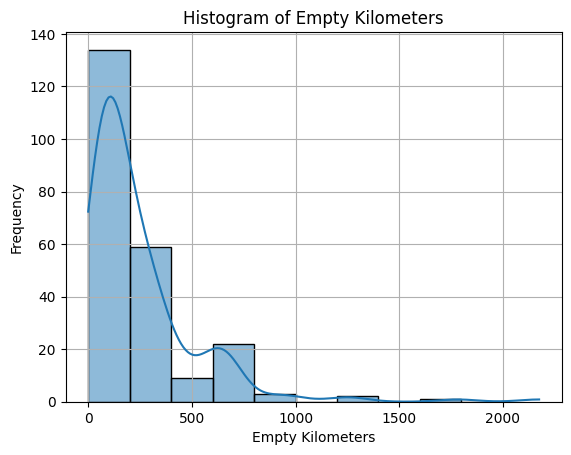

In [ ]:
empty_movement = df1[(df1.income == 0) & (df1.start_date.notna()) & (df1.load_km == 0)].sort_values(by = 'empty_km', ascending = False)

# Define bin edges
bin_edges = list(range(0, 2200, 200))  # Adjust the bin width as needed

# Create histogram using seaborn
sns.histplot(data=empty_movement, x='empty_km', bins=bin_edges, kde=True)
plt.xlabel('Empty Kilometers')
plt.ylabel('Frequency')
plt.title('Histogram of Empty Kilometers')
plt.grid(True)
plt.show()

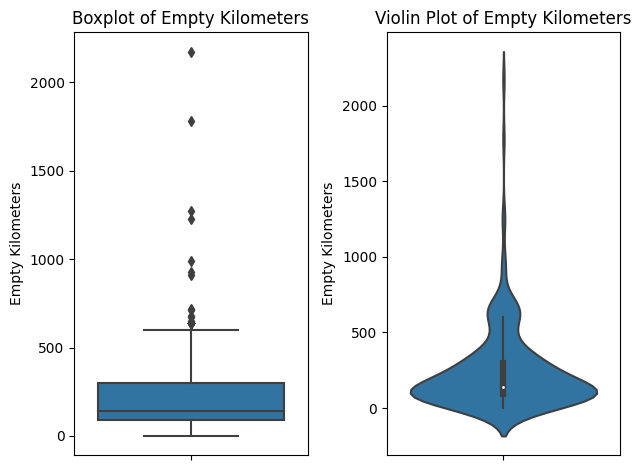

In [ ]:
# Create subplots for boxplot and violin plot
fig, axes = plt.subplots(1, 2)

# Boxplot
sns.boxplot(data=empty_movement, y='empty_km', ax=axes[0])
axes[0].set_ylabel('Empty Kilometers')
axes[0].set_title('Boxplot of Empty Kilometers')

# Violin plot
sns.violinplot(data=empty_movement, y='empty_km', ax=axes[1])
axes[1].set_ylabel('Empty Kilometers')
axes[1].set_title('Violin Plot of Empty Kilometers')

plt.tight_layout()
plt.show()

**Trips with no Income load_km not zero (6 Trips )**

In [ ]:
df_load = df1[(df1.income == 0) & (df1.start_date.notna()) & (df1.load_km != 0)]
print("Number of such trips : ",df_load.shape[0])
df_load

Number of such trips :  6


settlement_id  vehicle_no ownership             brand body_type  \
1281     SN2223FTS3345  NL01AF7766     Owned   TATA Motors Ltd      TR08   
1766     GM2223FTS2285  HR55AH5264     Owned          Mahindra      TR08   
2220     GM2223FTS2391   NL01Q0467     Owned   TATA Motors Ltd      TR08   
7831   CARTE2324FTS315  PB11CB7809     Owned   TATA Motors Ltd      TR08   
12901     PU2324FTS317  NL01AG3953     Owned   TATA Motors Ltd      TR08   
15877  CARTE2324FTS947  NL01AF8437     Owned  Ashok Leyand Ltd      TR08   

       vehicle_year      branch                                    customer  \
1281           2012      Sanand  Apl Logistics  Vascor Automotive Pvt. Ltd.   
1766           2019     Manesar                                         NaN   
2220           2016  Carterpuri                                         NaN   
7831           2017  Ranjangaon               Fca India Automobiles Pvt Ltd   
12901          2022      Nagpur         Mahindra Logistics Limited-(yuvraj)   
15877          2012      Sanand         Mahindra Logistics Limited-(yuvraj)   

                                          driver driver_id  \
1281   Niyaz Ansari S/o Samsuddin Ansari (d2073)     D2073   
1766     Dinesh Chandra S/o Bhoop Narayan(d1345)     D1345   
2220       Shivam Ojha S/o Virendra Ojha (d2006)     D2006   
7831              Rohit S/o Harish Chand (d2024)     D2024   
12901   Sakindar Kumar S/o Vishnudev Ray (d2161)     D2161   
15877                                        NaN       NaN   

                                                   route  \
1281   Sanand - Kiran Motors Ltd-surat Via Ahmedabad,...   
1766   Gurgaon Railway Station - Aligarh Via Sohna, P...   
2220                         Manesar - Delhi Via Gurgaon   
7831   Ranjangaon - Jaipur Via Dhule, Nayagaon, Bhilw...   
12901  Nagpur - Dharwad Via Wardha, Nanded, Solapur, ...   
15877  Manesar - Pantnagar Via Kmp, Eastern Periphera...   

                          from from_zone                      to to_zone  \
1281                    SANAND      West  KIRAN MOTORS LTD-SURAT    West   
1766   GURGAON RAILWAY STATION     North                 ALIGARH   North   
2220                   MANESAR     North                   DELHI   North   
7831                RANJANGAON      West                  JAIPUR   North   
12901                   NAGPUR      West                 DHARWAD   South   
15877                  MANESAR     North               PANTNAGAR   North   

               start_date            end_date  load_km  empty_km  income  \
1281  2023-01-27 21:00:00 2023-01-28 15:00:00      300       300       0   
1766  2023-02-03 17:00:00 2023-02-04 12:02:00      145       182       0   
2220  2023-02-11 14:30:00 2023-02-13 10:28:00       75        75       0   
7831  2023-06-04 14:00:00 2023-06-08 23:55:00     1560        70       0   
12901 2023-09-11 20:00:00 2023-09-18 16:25:00     1065       495       0   
15877 2023-10-27 15:40:00 2023-10-30 12:40:00      360         0       0   

       vehicle_freight  hire_charges  fuel_exp  cash_exp  fasttag  \
1281                 0             0     18472      1650     3998   
1766                 0             0      8165      1000      700   
2220                 0             0      4307      4239      935   
7831                 0             0     49709     13454    12978   
12901                0             0     41994      8187     9345   
15877                0             0     11485      2299     4990   

       driver_salary_mis  fooding_mis  maintenance_mis  tyre_mis  battery_mis  \
1281                   0            0                0         0            0   
1766                   0            0                0         0            0   
2220                   0            0                0         0            0   
7831                   0            0                0         0            0   
12901                  0            0                0         0            0   
15877                  0      

**Duplicate settlement IDs**

In [ ]:
# show rows where settlement_id is duplicate
df1[df1.duplicated(subset=['settlement_id'], keep=False)]

settlement_id  vehicle_no ownership             brand body_type  \
1420               NaN   HR55R5804     Owned   TATA Motors Ltd      TR08   
1421               NaN  NL01AG4716     Owned   TATA Motors Ltd      TR08   
1422               NaN  NL01AG4856     Owned   TATA Motors Ltd      TR08   
1423               NaN  NL01AG4857     Owned   TATA Motors Ltd      TR08   
1424               NaN  NL01AG4858     Owned   TATA Motors Ltd      TR08   
1425               NaN  NL01AG4859     Owned   TATA Motors Ltd      TR08   
1426               NaN  NL01AG4860     Owned   TATA Motors Ltd      TR08   
1427               NaN  NL01AG4861     Owned   TATA Motors Ltd      TR08   
1428               NaN   HR55R5804     Owned   TATA Motors Ltd      TR08   
1429               NaN  NL01AG3421     Owned   TATA Motors Ltd      TR08   
1430               NaN  NL01AG4856     Owned   TATA Motors Ltd      TR08   
1431               NaN  NL01AG4857     Owned   TATA Motors Ltd      TR08   
1432               NaN  NL01AG4859     Owned   TATA Motors Ltd      TR08   
1433               NaN   HR55R5799     Owned   TATA Motors Ltd      TR08   
1434               NaN   HR55R5804     Owned   TATA Motors Ltd      TR08   
1435               NaN  NL01AG3421     Owned   TATA Motors Ltd      TR08   
1436               NaN  NL01AG4856     Owned   TATA Motors Ltd      TR08   
1437               NaN  NL01AG4857     Owned   TATA Motors Ltd      TR08   
1438               NaN  NL01AG4859     Owned   TATA Motors Ltd      TR08   
1439               NaN   HR55R5799     Owned   TATA Motors Ltd      TR08   
1440               NaN   HR55R5804     Owned   TATA Motors Ltd      TR08   
2794   CARTE2223FTS768  NL01AF9397     Owned  Ashok Leyand Ltd       TOT   
3035               NaN   HR55R3780     Owned  Ashok Leyand Ltd       TOT   
3036               NaN   HR55R5799     Owned   TATA Motors Ltd      TR08   
3037               NaN   HR55R6331     Owned   TATA Motors Ltd      TR08   
3038               NaN   HR55R6332     Owned   TATA Motors Ltd      TR08   
3039               NaN   HR55R6334     Owned   TATA Motors Ltd      TR08   
3040               NaN  NL01AE7841     Owned   TATA Motors Ltd      TR08   
3041               NaN  NL01AG3419     Owned   TATA Motors Ltd      TR08   
3042               NaN  NL01AG5615     Owned   TATA Motors Ltd      TR08   
3043               NaN  NL01AG5616     Owned   TATA Motors Ltd      TR08   
3044               NaN  NL01AG5625     Owned   TATA Motors Ltd      TR08   
3045               NaN  NL01AG5647     Owned   TATA Motors Ltd      TR08   
3046               NaN  NL01AG5648     Owned   TATA Motors Ltd      TR08   
3047               NaN  NL01AG5788     Owned   TATA Motors Ltd      TR08   
3048               NaN  NL01AG5789     Owned   TATA Motors Ltd      TR08   
3049               NaN  NL01AG5790     Owned   TATA Motors Ltd      TR08   
3050               NaN  NL01AG6105     Owned  Ashok Leyand Ltd      TR08   
3051               NaN  NL01AG6339     Owned   TATA Motors Ltd      TR08   
3052               NaN  NL01AG6340     Owned   TATA Motors Ltd      TR08   
3053               NaN  NL01AG6341     Owned   TATA Motors Ltd      TR08   
3054               NaN  NL01AG6576     Owned   TATA Motors Ltd      TR08   
3055               NaN  NL01AG6577     Owned   TATA Motors Ltd      TR08   
3056               NaN  NL01AG6578     Owned   TATA Motors Ltd      TR08   
3062   CARTE2223FTS768  NL01AF9397     Owned  Ashok Leyand Ltd       TOT   
4631               NaN  HR55AE8843     Owned   TATA Motors Ltd      TR08   
4632               NaN  NL01AE7841     Owned   TATA Motors Ltd      TR08   
6041               NaN  HR55AE8843     Owned   TATA Motors Ltd      TR08   
6042               NaN   HR55R2359     Owned   TATA Motors Ltd      TR08   
6043               NaN   HR55R3343     Owned  Ashok Leyand Ltd       TOT   
6044               NaN   HR55R3344     Owned  Ashok Leyand Ltd       TOT   
6045               NaN   HR55R3404     Owned  Ashok Leyan

In [ ]:
#Removing those rows where start date is NA
df1 = df1[df1.start_date.notna()]

In [ ]:
df1.columns

Index(['settlement_id', 'vehicle_no', 'ownership', 'brand', 'body_type',
       'vehicle_year', 'branch', 'customer', 'driver', 'driver_id', 'route',
       'from', 'from_zone', 'to', 'to_zone', 'start_date', 'end_date',
       'load_km', 'empty_km', 'income', 'vehicle_freight', 'hire_charges',
       'fuel_exp', 'cash_exp', 'fasttag', 'driver_salary_mis', 'fooding_mis',
       'maintenance_mis', 'tyre_mis', 'battery_mis', 'document_mis',
       'report_month', 'report_year', 'start_month', 'end_month',
       'week_of_month_sd', 'route_new', 'route_cleaned', 'total_km',
       'trip_hour_days_roundoff'],
      dtype='object')

**DATA PROFITABILITY REPORT**

In [ ]:
path = "/content/drive/MyDrive/Pallia_Data/"

df_P = pd.read_excel(path+"COmbined_PPR.xlsx")
print(df_P.shape)
df_P.head(1)

(15739, 63)


Sr. No.    Branch Settlement ID Settlement Date   Trip Start ID  \
0        1  Haridwar  HR2223FTS647      2023-01-16  `490090,490091   

   Vehicle No                                  Route  \
0  NL01AG0986  Haridwar - Dimapur,Dimapur - Haridwar   

                          Driver Name  Load Km  Empty Km Reporting Date  \
0  Vinod Kumar S/o Har Prasad (d1795)     2300      2300     2022-12-20   

  Booking Date   End Date     Slab1  Slab2   Freight  Additional Freight  \
0   2022-12-22 2023-01-15  216844.0    0.0  216844.0                 0.0   

   Net Freight  Vehicle Freight Bill Status Trip Status Settlement Status  \
0     216844.0         216844.0    Unbilled     Settled          Approved   

   Diesel Budget  Cash Budget  Toll Budget   Fastag  Issued Diesel  \
0           1475        11460            0  25155.0         1475.0   

   Passed Diesel  Driver Payable  Fuel C/F  Fuel B/F  Amount C/F  Amount B/F  \
0         1475.0         -4231.0       0.0       0.0         0.0         0.0   

   Diesel Purchased  Cash Advance Issued  Diesel Expense  Cash Expense  \
0         131726.25              19730.0        131422.5       23961.0   

   POD Incentive Expense  Other Expense  Fooding Expense  \
0                  600.0              0                0   

   Driver Incentive Expense  Toll Tax Expense  Miscellaneous Expense  \
0                    4255.0              1936                 7300.0   

   Loading/Unloading  Maintenance Expense  Document Expense  Tyre Expense  \
0             2500.0                    0                 0             0   

   Fuel Expense  Running Expense  Parking Expenses  AMC Expense  \
0      131422.5                0              2370            0   

   Discount On Freight  Delay & Penalty  Challan Expense  Short & Excess  \
0                    0                0             5000             0.0   

   PUC Expense  Vehicle Accident Expense  Tyre Puncher Expense  \
0            0                         0                     0   

   Cash Fuel Expense  Battery Expense  Add Blue Expense   Margin  Margin %  
0                0.0                0                 0  36305.5     16.74

In [ ]:
#path = "/content/drive/MyDrive/Pallia_Data/"

#df_P = pd.read_csv(path+"Combined_Data_Profitability.csv")
#print(df_P.shape)
#df_P.head(1)

In [ ]:






#replace space with _ in column names in dataframe df_P remove .(dots)   if any also make everything in lower letters
df_P.columns = df_P.columns.str.lower().str.replace(' ', '_').str.replace('.', '')

#Renaming columns
df_P = df_P.rename(columns={'fuel_c/f': 'fuel_cf', 'fuel_b/f': 'fuel_bf', 'amount_c/f': 'amount_cf','amount_b/f': 'amount_bf','loading/unloading':'loading_unloading','margin_%': 'margin_prcntg'  })


In [ ]:
df_P.columns

Index(['sr_no', 'branch', 'settlement_id', 'settlement_date', 'trip_start_id',
       'vehicle_no', 'route', 'driver_name', 'load_km', 'empty_km',
       'reporting_date', 'booking_date', 'end_date', 'slab1', 'slab2',
       'freight', 'additional_freight', 'net_freight', 'vehicle_freight',
       'bill_status', 'trip_status', 'settlement_status', 'diesel_budget',
       'cash_budget', 'toll_budget', 'fastag', 'issued_diesel',
       'passed_diesel', 'driver_payable', 'fuel_cf', 'fuel_bf', 'amount_cf',
       'amount_bf', 'diesel_purchased', 'cash_advance_issued',
       'diesel_expense', 'cash_expense', 'pod_incentive_expense',
       'other_expense', 'fooding_expense', 'driver_incentive_expense',
       'toll_tax_expense', 'miscellaneous_expense', 'loading_unloading',
       'maintenance_expense', 'document_expense', 'tyre_expense',
       'fuel_expense', 'running_expense', 'parking_expenses', 'amc_expense',
       'discount_on_freight', 'delay_&_penalty', 'challan_expense',
       '

In [ ]:
# remove unecessary / not_required columns
drop_columns  = ['sr_no', 'settlement_date','trip_start_id', 'slab1', 'slab2', 'freight', 'additional_freight', 'net_freight', 'bill_status',
                 'trip_status', 'settlement_status','issued_diesel', 'passed_diesel','driver_payable', 'fuel_cf', 'fuel_bf', 'amount_cf', 'amount_bf',
       'diesel_purchased', 'cash_advance_issued','short_&_excess']
df_P.drop(drop_columns , axis=1, inplace=True)


In [ ]:
#Remove columns with no values inside it
drop_columns1 = ['other_expense', 'fooding_expense', 'document_expense', 'tyre_expense', 'running_expense','amc_expense', 'discount_on_freight',
       'delay_&_penalty','battery_expense', 'add_blue_expense','margin','margin_prcntg']

df_P.drop(drop_columns1 , axis=1, inplace=True)

In [ ]:
# drop rows where settlement are present in list

# GM2324FTS1539 : Short & Excess value is -2936
# NS2324FTS331 : Incorrect enteries in PPR report not matching with TMS
drop_settlement_id = ["NS2324FTS331","GM2324FTS1539"]
df_P = df_P[~df_P['settlement_id'].isin(drop_settlement_id)]

In [ ]:
df_P.describe()

load_km      empty_km  vehicle_freight  diesel_budget  \
count  15737.000000  15737.000000     15737.000000   15737.000000   
mean     763.494186    279.463938     66563.818015     326.182881   
std      676.427284    317.138777     53539.390265     265.916366   
min        0.000000      0.000000         0.000000       0.000000   
25%      200.000000     50.000000     24587.000000     115.000000   
50%      550.000000    180.000000     52873.000000     272.000000   
75%     1195.000000    420.000000     98706.000000     483.000000   
max     3700.000000   2500.000000    928758.280000    1792.000000   

        cash_budget   toll_budget        fastag  diesel_expense  cash_expense  \
count  15737.000000  15737.000000  15737.000000    15737.000000  15737.000000   
mean    3758.703755      0.181102   8121.989483    30202.651456   5926.991165   
std     3245.245931     13.630463   6942.370237    24548.982713   4885.940170   
min        0.000000      0.000000      0.000000   -44371.080000 -26593.000000   
25%     1100.000000      0.000000   2435.000000    10677.870000   2000.000000   
50%     3188.000000      0.000000   6565.000000    25217.120000   5200.000000   
75%     5200.000000      0.000000  12216.000000    44988.480000   8300.000000   
max    19236.000000   1140.000000  44320.000000   163037.070000  63924.000000   

       pod_incentive_expense  driver_incentive_expense  toll_tax_expense  \
count           15737.000000              15737.000000      15737.000000   
mean              961.432991                567.028836        297.317278   
std               418.738979                876.087728        528.647671   
min             -2000.000000                  0.000000       -575.000000   
25%               600.000000                  0.000000          0.000000   
50%              1000.000000                  0.000000          0.000000   
75%              1100.000000                934.250000        478.000000   
max              6000.000000               5483.000000       5300.000000   

       miscellaneous_expense  loading_unloading  maintenance_expense  \
count           15737.000000       15737.000000         15737.000000   
mean             2856.870849         518.576075            28.880790   
std              2910.638096        1476.804174           216.680925   
min              -500.000000        -649.000000             0.000000   
25%               500.000000           0.000000             0.000000   
50%              1800.000000           0.000000             0.000000   
75%              4400.000000         500.000000             0.000000   
max             18200.000000       39600.000000          7300.000000   

        fuel_expense  parking_expenses  challan_expense   puc_expense  \
count   15737.000000      15737.000000     15737.000000  15737.000000   
mean    29987.925720        106.747665       580.056555      1.914596   
std     24457.856489        298.823008      1617.779081     22.329415   
min    -44371.080000          0.000000    -28500.000000      0.000000   
25%     10556.280000          0.000000         0.000000      0.000000   
50%     25089.630000          0.000000         0.000000      0.000000   
75%     44692.750000          0.000000         0.000000      0.000000   
max    163037.070000       5060.000000     22500.000000   1000.000000   

       vehicle_accident_expense  tyre_puncher_expense  cash_fuel_expense  
count              15737.000000          15737.000000       15737.000000  
mean                   1.031327             41.876787         178.075764  
std                  104.780911            177.329311         716.549269  
min                    0.000000              0.000000       -1887.690000  
25%                    0.000000              0.000000           0.000000  
50%                    0.000000              0.000000           0.000000  
75%                    0.000000              0.000000           0.000000  
max                13000.000000           2400.000000        4600.00

 **Driver Salary Calculated : Load_KM * 1.35 + Empty_KM * 0.5**

In [ ]:
df_P['driver_salary'] = (df_P['load_km'] * 1.35) + (df_P['empty_km']*0.5)

**Driver Fooding**

In [ ]:
df_P[['settlement_id','reporting_date','booking_date','end_date']].head(20)

settlement_id reporting_date booking_date   end_date
0      HR2223FTS647     2022-12-20   2022-12-22 2023-01-15
1   CARTE2223FTS573     2022-12-22   2022-12-23 2023-01-04
2   CARTE2223FTS570     2022-12-10   2022-12-24 2023-01-04
3     GM2223FTS2066     2022-12-22   2022-12-24 2023-01-12
4     GM2223FTS2294     2022-12-24   2022-12-24 2023-01-14
5     GM2223FTS2062     2022-12-25   2022-12-25 2023-01-12
6     CH2223FTS1557     2022-12-24   2022-12-26 2023-01-04
7   CARTE2223FTS567     2022-12-26   2022-12-26 2023-01-03
8   CARTE2223FTS580     2022-12-22   2022-12-26 2023-01-04
9      BN2223FTS209     2022-12-19   2022-12-27 2023-01-03
10     HR2223FTS633     2022-12-24   2022-12-27 2023-01-04
11     RD2223FTS675     2022-12-27   2022-12-27 2023-01-04
12     RD2223FTS678     2022-12-27   2022-12-27 2023-01-03
13     HR2223FTS630     2022-12-27   2022-12-27 2023-01-04
14     RD2223FTS698     2022-12-27   2022-12-27 2023-01-16
15     BN2223FTS212     2022-12-27   2022-12-28 2023-01-06
16  CARTE2223FTS597     2022-12-28   2022-12-28 2023-01-11
17  CARTE2223FTS577     2022-12-28   2022-12-28 2023-01-06
18    CH2223FTS1551     2022-12-25   2022-12-27 2023-01-02
19    HSR2223FTS848     2022-12-22   2022-12-28 2023-01-03

**DRIVER FOODING**

**Calculating Duration for Fodding calculation- [Reporting date - End date]**  

In [ ]:
#Calculating duration in days

df_P['fooding_duration'] = (( df_P['end_date'] - df_P['reporting_date']).dt.days)
df_P['fooding_duration'] = df_P['fooding_duration'] + 1
df_P[['settlement_id','reporting_date','booking_date','end_date','fooding_duration']].head()

settlement_id reporting_date booking_date   end_date  fooding_duration
0     HR2223FTS647     2022-12-20   2022-12-22 2023-01-15                27
1  CARTE2223FTS573     2022-12-22   2022-12-23 2023-01-04                14
2  CARTE2223FTS570     2022-12-10   2022-12-24 2023-01-04                26
3    GM2223FTS2066     2022-12-22   2022-12-24 2023-01-12                22
4    GM2223FTS2294     2022-12-24   2022-12-24 2023-01-14                22

**Calculating Fooding expense [No of trip days * 250]**

In [ ]:
df_P['fooding_expense'] = df_P['fooding_duration'] * 250

**CALCULATING TRIP EXPENSE  [ Fooding + Fasttag + Diesel + POD + Driver_Salary + toll_tax + miscellaneous + loading_unloading + inroute_maintenance + parking + challan + puc + vehicle_accident_expense + tyre_puncture_expense + cash_fuel_expense]**

In [ ]:
df_P['trip_expense'] = df_P['fooding_expense'] + df_P['fastag'] + df_P['diesel_expense'] + df_P['pod_incentive_expense'] + df_P['driver_salary'] + df_P['toll_tax_expense'] + df_P['miscellaneous_expense'] + df_P['loading_unloading'] + df_P['maintenance_expense'] + df_P['parking_expenses'] + df_P['challan_expense'] + df_P['puc_expense'] + df_P['vehicle_accident_expense'] + df_P['tyre_puncher_expense'] + df_P['cash_fuel_expense']

In [ ]:
df_P.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15737 entries, 0 to 15738
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   branch                    15737 non-null  object        
 1   settlement_id             15737 non-null  object        
 2   vehicle_no                15737 non-null  object        
 3   route                     15737 non-null  object        
 4   driver_name               15730 non-null  object        
 5   load_km                   15737 non-null  int64         
 6   empty_km                  15737 non-null  int64         
 7   reporting_date            15737 non-null  datetime64[ns]
 8   booking_date              15737 non-null  datetime64[ns]
 9   end_date                  15737 non-null  datetime64[ns]
 10  vehicle_freight           15737 non-null  float64       
 11  diesel_budget             15737 non-null  int64         
 12  cash_budget       

In [ ]:
#Rename miscellaneous_expense as border expense

In [ ]:
# add _p at end of each column name
df_P.columns = [col + '_p' for col in df_P.columns]

In [ ]:
df_P.isna().sum()

branch_p                      0
settlement_id_p               0
vehicle_no_p                  0
route_p                       0
driver_name_p                 7
load_km_p                     0
empty_km_p                    0
reporting_date_p              0
booking_date_p                0
end_date_p                    0
vehicle_freight_p             0
diesel_budget_p               0
cash_budget_p                 0
toll_budget_p                 0
fastag_p                      0
diesel_expense_p              0
cash_expense_p                0
pod_incentive_expense_p       0
driver_incentive_expense_p    0
toll_tax_expense_p            0
miscellaneous_expense_p       0
loading_unloading_p           0
maintenance_expense_p         0
fuel_expense_p                0
parking_expenses_p            0
challan_expense_p             0
puc_expense_p                 0
vehicle_accident_expense_p    0
tyre_puncher_expense_p        0
cash_fuel_expense_p           0
driver_salary_p               0
fooding_

In [ ]:
df1.columns

Index(['settlement_id', 'vehicle_no', 'ownership', 'brand', 'body_type',
       'vehicle_year', 'branch', 'customer', 'driver', 'driver_id', 'route',
       'from', 'from_zone', 'to', 'to_zone', 'start_date', 'end_date',
       'load_km', 'empty_km', 'income', 'vehicle_freight', 'hire_charges',
       'fuel_exp', 'cash_exp', 'fasttag', 'driver_salary_mis', 'fooding_mis',
       'maintenance_mis', 'tyre_mis', 'battery_mis', 'document_mis',
       'report_month', 'report_year', 'start_month', 'end_month',
       'week_of_month_sd', 'route_new', 'route_cleaned', 'total_km',
       'trip_hour_days_roundoff'],
      dtype='object')

In [ ]:
df_MIS  = df1[['settlement_id','vehicle_no','brand','body_type','ownership','vehicle_year','branch','customer','driver_id','from', 'from_zone', 'to', 'to_zone','load_km', 'empty_km','start_date','end_date','report_month', 'report_year',
     'start_month', 'end_month','week_of_month_sd', 'route_new', 'route_cleaned', 'total_km',]]

In [ ]:
#add _mis after each column name in df_MIS
df_MIS.columns = [col + '_mis' for col in df_MIS.columns]

In [ ]:
df_MIS.columns

Index(['settlement_id_mis', 'vehicle_no_mis', 'brand_mis', 'body_type_mis',
       'ownership_mis', 'vehicle_year_mis', 'branch_mis', 'customer_mis',
       'driver_id_mis', 'from_mis', 'from_zone_mis', 'to_mis', 'to_zone_mis',
       'load_km_mis', 'empty_km_mis', 'start_date_mis', 'end_date_mis',
       'report_month_mis', 'report_year_mis', 'start_month_mis',
       'end_month_mis', 'week_of_month_sd_mis', 'route_new_mis',
       'route_cleaned_mis', 'total_km_mis'],
      dtype='object')

**MERGING DATA**

In [ ]:
df_P.columns

Index(['branch_p', 'settlement_id_p', 'vehicle_no_p', 'route_p',
       'driver_name_p', 'load_km_p', 'empty_km_p', 'reporting_date_p',
       'booking_date_p', 'end_date_p', 'vehicle_freight_p', 'diesel_budget_p',
       'cash_budget_p', 'toll_budget_p', 'fastag_p', 'diesel_expense_p',
       'cash_expense_p', 'pod_incentive_expense_p',
       'driver_incentive_expense_p', 'toll_tax_expense_p',
       'miscellaneous_expense_p', 'loading_unloading_p',
       'maintenance_expense_p', 'fuel_expense_p', 'parking_expenses_p',
       'challan_expense_p', 'puc_expense_p', 'vehicle_accident_expense_p',
       'tyre_puncher_expense_p', 'cash_fuel_expense_p', 'driver_salary_p',
       'fooding_duration_p', 'fooding_expense_p', 'trip_expense_p'],
      dtype='object')

In [ ]:
# left join df_P with df_MIS using settlement_id
df = df_P.merge(df_MIS, left_on = 'settlement_id_p', right_on = 'settlement_id_mis', how = 'left')
df.head(2)


branch_p  settlement_id_p vehicle_no_p  \
0     Haridwar     HR2223FTS647   NL01AG0986   
1  Head Office  CARTE2223FTS573   NL01AG3676   

                                      route_p  \
0       Haridwar - Dimapur,Dimapur - Haridwar   
1  Hosur - Moti Khavadi,Moti Khavadi - Shapar   

                          driver_name_p  load_km_p  empty_km_p  \
0    Vinod Kumar S/o Har Prasad (d1795)       2300        2300   
1  Md Shahabuddin S/o Md N Khan (d1822)       1885         140   

  reporting_date_p booking_date_p end_date_p  vehicle_freight_p  \
0       2022-12-20     2022-12-22 2023-01-15           216844.0   
1       2022-12-22     2022-12-23 2023-01-04           168000.0   

   diesel_budget_p  cash_budget_p  toll_budget_p  fastag_p  diesel_expense_p  \
0             1475          11460              0   25155.0         131422.50   
1              717           6000              0   12948.0          64085.46   

   cash_expense_p  pod_incentive_expense_p  driver_incentive_expense_p  \
0         23961.0                    600.0                      4255.0   
1         16755.0                      0.0                         0.0   

   toll_tax_expense_p  miscellaneous_expense_p  loading_unloading_p  \
0                1936                   7300.0               2500.0   
1                 376                   7500.0                  0.0   

   maintenance_expense_p  fuel_expense_p  parking_expenses_p  \
0                      0       131422.50                2370   
1                      0        68465.08                   0   

   challan_expense_p  puc_expense_p  vehicle_accident_expense_p  \
0               5000              0                           0   
1               4500              0                           0   

   tyre_puncher_expense_p  cash_fuel_expense_p  driver_salary_p  \
0                       0                  0.0          4255.00   
1                       0                  0.0          2614.75   

   fooding_duration_p  fooding_expense_p  trip_expense_p settlement_id_mis  \
0                  27               6750       187288.50      HR2223FTS647   
1                  14               3500        95524.21   CARTE2223FTS573   

  vehicle_no_mis         brand_mis body_type_mis ownership_mis  \
0     NL01AG0986   TATA Motors Ltd          TR08         Owned   
1     NL01AG3676  Ashok Leyand Ltd           TOT         Owned   

   vehicle_year_mis   branch_mis                 customer_mis driver_id_mis  \
0            2012.0     Haridwar   Mahindra Logistics Limited         D1795   
1            2012.0  Head Office  Reliance Industries Limited         D1822   

   from_mis from_zone_mis        to_mis to_zone_mis  load_km_mis  \
0  HARIDWAR         North       DIMAPUR        East       2300.0   
1     HOSUR         South  MOTI KHAVADI        West       1885.0   

   empty_km_mis      start_date_mis        end_date_mis report_month_mis  \
0        2300.0 2022-12-22 21:00:00 2023-01-04 19:55:00              Jan   
1         140.0 2022-12-23 10:40:00 2023-01-01 19:20:00              Jan   

  report_year_mis  start_month_mis  end_month_mis  week_of_month_sd_mis  \
0              23             12.0            1.0                   4.0   
1              23             12.0            1.0                   4.0   

        route_new_mis                                  route_cleaned_mis  \
0    HARIDWAR-DIMAPUR  HARIDWAR DIMAPUR VIA NAJIJABAD RUDRAPUR BAREIL...   
1  HOSUR-MOTI KHAVADI  HOSUR MOTI KHAVADI VIA HOSUR, DHARWAD, PUNE, N...   

   total_km_mis  
0        4600.0  
1        2025.0

In [ ]:
df.isna().sum()

branch_p                        0
settlement_id_p                 0
vehicle_no_p                    0
route_p                         0
driver_name_p                   7
load_km_p                       0
empty_km_p                      0
reporting_date_p                0
booking_date_p                  0
end_date_p                      0
vehicle_freight_p               0
diesel_budget_p                 0
cash_budget_p                   0
toll_budget_p                   0
fastag_p                        0
diesel_expense_p                0
cash_expense_p                  0
pod_incentive_expense_p         0
driver_incentive_expense_p      0
toll_tax_expense_p              0
miscellaneous_expense_p         0
loading_unloading_p             0
maintenance_expense_p           0
fuel_expense_p                  0
parking_expenses_p              0
challan_expense_p               0
puc_expense_p                   0
vehicle_accident_expense_p      0
tyre_puncher_expense_p          0
cash_fuel_expe

**61 enteries in PPR report which are missing in MIS report**

In [ ]:
df[(df.settlement_id_mis.isna())].shape

(61, 59)

**Out of 61 , 43 enteries are those which have zero load KM (Empty- Movement) 18 Load movements**

In [ ]:
#where load KM is not zero
df[(df.settlement_id_mis.isna()) & (df.load_km_p != 0)].shape#['vehicle_freight_p'].sum()

(18, 59)

**Total load_km, empty_km & freight in this missing data**

In [ ]:
df[(df.settlement_id_mis.isna()) & (df.load_km_p != 0)][['load_km_p','empty_km_p','vehicle_freight_p']].sum()

load_km_p              26265.00
empty_km_p             14844.00
vehicle_freight_p    2277729.44
dtype: float64

**Dropping this data**

In [ ]:

#drop rows where settlement_id_mis is na
df = df.dropna(subset=['settlement_id_mis'])

**319 such trips where there is no income**

In [ ]:
df[(df.vehicle_freight_p == 0)].shape

(319, 59)

**Out of 319 , 310 trips have no load KM that means it is empty movement for relocation**

In [ ]:
df[(df.vehicle_freight_p == 0) & (df.load_km_p == 0)].shape

(310, 59)

**There are 9 Trips which has load still there is no income**

In [ ]:
print(df[(df.vehicle_freight_p == 0) & (df.load_km_p != 0)].shape)
df[(df.vehicle_freight_p == 0) & (df.load_km_p != 0)]

(9, 59)


branch_p  settlement_id_p vehicle_no_p  \
1724      Manesar    GM2223FTS2285   HR55AH5264   
2200   Carterpuri    GM2223FTS2391    NL01Q0467   
7630         Pune  CARTE2324FTS315   PB11CB7809   
12624      Nagpur     PU2324FTS317   NL01AG3953   
14778       Hosur  CARTE2324FTS925   NL01AF9980   
15026       Hosur  CARTE2324FTS919   NL01AG2779   
15271  Carterpuri  CARTE2324FTS944   NL01AF7763   
15593      Sanand  CARTE2324FTS947   NL01AF8437   
15699   Bangalore    HSR2324FTS736    NL01N2609   

                                                 route_p  \
1724   Manesar - Gurgaon Railway Station,Gurgaon Rail...   
2200                     Manesar - Delhi,Delhi - Manesar   
7630               Pune - Ranjangaon,Ranjangaon - Jaipur   
12624    Nagpur - Nagpur,Nagpur - Dharwad,Dharwad - Pune   
14778    Hosur - Rohtak,Rohtak - Manesar,Manesar - Alwar   
15026  Hosur - Gurgaon,Gurgaon - Manesar,Manesar - Alwar   
15271                   Ennore - Jaipur,Jaipur - Manesar   
15593                                Manesar - Pantnagar   
15699  Bangalore - Surakshaa Car Electronic City,Sura...   

                                   driver_name_p  load_km_p  empty_km_p  \
1724     Dinesh Chandra S/o Bhoop Narayan(d1345)        145         182   
2200       Shivam Ojha S/o Virendra Ojha (d2006)         75          75   
7630              Rohit S/o Harish Chand (d2024)       1560          70   
12624   Sakindar Kumar S/o Vishnudev Ray (d2161)       1065         495   
14778       Surendar Kumar S/O Ram Karan (D0990)       2290         180   
15026           Jagdish Prasad S/o Jethu (d0909)       2167         125   
15271        Haider Khan S/o Shamim Khan (d0505)       2190         225   
15593  Suhel Khan S/o Tofiq Alam (pappu) (d1142)        360           0   
15699           Amit Kumar S/o Ram Sagar (d2262)         75          35   

      reporting_date_p booking_date_p end_date_p  vehicle_freight_p  \
1724        2023-02-03     2023-02-03 2023-02-06                0.0   
2200        2023-02-10     2023-02-11 2023-02-13                0.0   
7630        2023-06-04     2023-06-04 2023-06-08                0.0   
12624       2023-09-09     2023-09-10 2023-09-19                0.0   
14778       2023-10-11     2023-10-14 2023-10-26                0.0   
15026       2023-10-17     2023-10-18 2023-10-25                0.0   
15271       2023-10-16     2023-10-21 2023-10-30                0.0   
15593       2023-10-03     2023-10-27 2023-10-30                0.0   
15699       2023-10-29     2023-10-29 2023-10-30                0.0   

       diesel_budget_p  cash_budget_p  toll_budget_p  fastag_p  \
1724                91            500              0    1165.0   
2200                48           4800              0     935.0   
7630               520           8468              0   11138.0   
12624              443           3688              0    9345.0   
14778              875          10513              0   22170.0   
15026              814          14076              0   20910.0   
15271              853          15559              0   22348.0   
15593              120              0              0    4990.0   
15699               36           1000              0    1430.0   

       diesel_expense_p  cash_expense_p  pod_incentive_expense_p  \
1724            8165.43          1000.0                    500.0   
2200            4307.04          4239.0                      0.0   
7630           49708.70         13454.0                   1500.0   
12624          41994.02          6812.0                   1500.0   
14778          76773.72         16876.0                   1500.0   
15026          73463.50         16876.0                   1500.0   
15271          77895.96         19878.0                   1500.0   
15593          11485.44           325.0                   1500.0   
15699           3174.48          1819.0                      0.0   

       driver_incentive_expense_p  toll_tax_expense_p  \
1724                         0.00   

**Dropping rows where income is zero as this will create issue in calculations**

In [ ]:
df = df[df.vehicle_freight_p != 0]
print(df.shape)

(15358, 59)


**CALCULATING GROSS PROFIT & GROSS PROFIT PRCNTG**

In [ ]:
df["gross_profit"] = df['vehicle_freight_p'] - df['trip_expense_p']

df["gross_profit_prcntg"] = round((df["gross_profit"] / df['vehicle_freight_p'])*100,2)

In [ ]:
df.head(2)

branch_p  settlement_id_p vehicle_no_p  \
0     Haridwar     HR2223FTS647   NL01AG0986   
1  Head Office  CARTE2223FTS573   NL01AG3676   

                                      route_p  \
0       Haridwar - Dimapur,Dimapur - Haridwar   
1  Hosur - Moti Khavadi,Moti Khavadi - Shapar   

                          driver_name_p  load_km_p  empty_km_p  \
0    Vinod Kumar S/o Har Prasad (d1795)       2300        2300   
1  Md Shahabuddin S/o Md N Khan (d1822)       1885         140   

  reporting_date_p booking_date_p end_date_p  vehicle_freight_p  \
0       2022-12-20     2022-12-22 2023-01-15           216844.0   
1       2022-12-22     2022-12-23 2023-01-04           168000.0   

   diesel_budget_p  cash_budget_p  toll_budget_p  fastag_p  diesel_expense_p  \
0             1475          11460              0   25155.0         131422.50   
1              717           6000              0   12948.0          64085.46   

   cash_expense_p  pod_incentive_expense_p  driver_incentive_expense_p  \
0         23961.0                    600.0                      4255.0   
1         16755.0                      0.0                         0.0   

   toll_tax_expense_p  miscellaneous_expense_p  loading_unloading_p  \
0                1936                   7300.0               2500.0   
1                 376                   7500.0                  0.0   

   maintenance_expense_p  fuel_expense_p  parking_expenses_p  \
0                      0       131422.50                2370   
1                      0        68465.08                   0   

   challan_expense_p  puc_expense_p  vehicle_accident_expense_p  \
0               5000              0                           0   
1               4500              0                           0   

   tyre_puncher_expense_p  cash_fuel_expense_p  driver_salary_p  \
0                       0                  0.0          4255.00   
1                       0                  0.0          2614.75   

   fooding_duration_p  fooding_expense_p  trip_expense_p settlement_id_mis  \
0                  27               6750       187288.50      HR2223FTS647   
1                  14               3500        95524.21   CARTE2223FTS573   

  vehicle_no_mis         brand_mis body_type_mis ownership_mis  \
0     NL01AG0986   TATA Motors Ltd          TR08         Owned   
1     NL01AG3676  Ashok Leyand Ltd           TOT         Owned   

   vehicle_year_mis   branch_mis                 customer_mis driver_id_mis  \
0            2012.0     Haridwar   Mahindra Logistics Limited         D1795   
1            2012.0  Head Office  Reliance Industries Limited         D1822   

   from_mis from_zone_mis        to_mis to_zone_mis  load_km_mis  \
0  HARIDWAR         North       DIMAPUR        East       2300.0   
1     HOSUR         South  MOTI KHAVADI        West       1885.0   

   empty_km_mis      start_date_mis        end_date_mis report_month_mis  \
0        2300.0 2022-12-22 21:00:00 2023-01-04 19:55:00              Jan   
1         140.0 2022-12-23 10:40:00 2023-01-01 19:20:00              Jan   

  report_year_mis  start_month_mis  end_month_mis  week_of_month_sd_mis  \
0              23             12.0            1.0                   4.0   
1              23             12.0            1.0                   4.0   

        route_new_mis                                  route_cleaned_mis  \
0    HARIDWAR-DIMAPUR  HARIDWAR DIMAPUR VIA NAJIJABAD RUDRAPUR BAREIL...   
1  HOSUR-MOTI KHAVADI  HOSUR MOTI KHAVADI VIA HOSUR, DHARWAD, PUNE, N...   

   total_km_mis  gross_profit  gross_profit_prcntg  
0        4600.0      29555.50                13.63  
1        2025.0      72475.79                43.14

In [ ]:
#  drop settlement_id BN2324FTS259 incorrect entry in vehicle freight

df = df[df['settlement_id_p'] != 'BN2324FTS259']

df = df[df['settlement_id_p'] != 'GM2324FTS665']

In [ ]:
#Total Revenue
total_revenue = df.vehicle_freight_p.sum()

#Total Gross Profit
total_profit = df.gross_profit.sum()

**COST ANALYSIS**

In [ ]:
Total_Revenue = df.vehicle_freight_p.sum()
print("Total Revenue generated Jan-Oct is INR :",Total_Revenue)

Revenue_Per_Trip = round(Total_Revenue/df.settlement_id_mis.count())
print("Revenue_Per_Trip is INR :",Revenue_Per_Trip)

Total Revenue generated Jan-Oct is INR : 1045387955.14
Revenue_Per_Trip is INR : 68077


In [ ]:
Total_Operational_expense = df.trip_expense_p.sum()
print("Total Total_Operational_expense Jan-Oct is INR :",Total_Operational_expense)

Operational_expense_per_trip = round(Total_Operational_expense/df.settlement_id_mis.count())
print("Operational_expense_per_trip is INR :",Operational_expense_per_trip)

Total Total_Operational_expense Jan-Oct is INR : 731707063.8
Operational_expense_per_trip is INR : 47650


In [ ]:
Total_gross_profit = df.gross_profit.sum()
print("Total Total_gross_profit Jan-Oct is INR :",round(Total_gross_profit))

Gross_Profit_Per_Trip = round(Total_gross_profit/df.settlement_id_mis.count() )
print("Gross_Profit_Per_Trip is INR :",Gross_Profit_Per_Trip)

Total Total_gross_profit Jan-Oct is INR : 313680891
Gross_Profit_Per_Trip is INR : 20427


**Month Wise Breakdown**

In [ ]:
monthly_business = df.groupby('report_month_mis').agg(Trips = ('settlement_id_mis', 'count'), Revenue = ('vehicle_freight_p', 'sum'), Operating_Cost = ('trip_expense_p','sum'),
                                                      Gross_Profit=('gross_profit','sum')  ).reset_index()
monthly_business['Revenue_Prcntg'] =   round((monthly_business['Revenue']  / Total_Revenue)*100,2)
monthly_business['Gross_Profit_Prcntg'] =   round((monthly_business['Gross_Profit']  / Total_gross_profit)*100,2)
monthly_business = monthly_business[['report_month_mis','Trips','Revenue','Revenue_Prcntg', 'Operating_Cost', 'Gross_Profit','Gross_Profit_Prcntg']]
# Set display options to show float values without scientific notation
pd.options.display.float_format = '{:.2f}'.format
monthly_business

report_month_mis  Trips      Revenue  Revenue_Prcntg  Operating_Cost  \
0              Apr   1368  96239388.49            9.21     67177004.75   
1              Aug   1639 106485228.17           10.19     74925689.65   
2              Feb   1539  93875358.90            8.98     65094787.22   
3              Jan   1378  84823956.64            8.11     59441221.28   
4              Jul   1488 103688925.84            9.92     73617106.53   
5              Jun   1372  93500363.53            8.94     66436451.98   
6              Mar   1518  99147848.82            9.48     69631706.86   
7              May   1331  91647909.21            8.77     65131536.21   
8              Oct   1971 149619991.05           14.31    102841978.39   
9              Sep   1752 126358984.49           12.09     87409580.93   

   Gross_Profit  Gross_Profit_Prcntg  
0   29062383.74                 9.26  
1   31559538.52                10.06  
2   28780571.68                 9.18  
3   25382735.36                 8.09  
4   30071819.31                 9.59  
5   27063911.55                 8.63  
6   29516141.96                 9.41  
7   26516373.00                 8.45  
8   46778012.66                14.91  
9   38949403.56                12.42

In [ ]:
MIS_expense = df_owned.groupby('report_month').agg(Maintenace = ('maintenance_mis','sum'),
                                           Tyre = ('tyre_mis','sum'), Battery = ('battery_mis','sum'), Documents = ('document_mis','sum')).reset_index()
MIS_expense['Total_MIS'] = MIS_expense['Maintenace'] + MIS_expense['Tyre'] + MIS_expense['Battery'] + MIS_expense['Documents']
MIS_expense

report_month  Maintenace     Tyre  Battery  Documents  Total_MIS
0          Apr     1550164  1870444   137430    1803356    5361394
1          Aug     2374426  2456221   196471          0    5027118
2          Feb     1957473  1997349   135313    1298550    5388685
3          Jan     2016869  2047041   138516          0    4202426
4          Jul     2969246  2466382   191587          0    5627215
5          Jun     2518783  2211025   103728          0    4833536
6          Mar     2567071  1985827   114586          0    4667484
7          May     1837694  2033707   172501    1875392    5919294
8          Oct     1961620  4113393   151981          0    6226994
9          Sep     1666306  3793282   123464          0    5583052

**Merging with MIS expenses (Maintenance , Battery, Document, Tyre)**  

**To calculate exact Net Margin we need to include Admin cost , depreciation and other overhead costs**

In [ ]:
merge_business = monthly_business.merge(MIS_expense, left_on = 'report_month_mis', right_on = 'report_month', how = 'inner')
merge_business.drop(['report_month' ], axis = 1, inplace  = True)
#Approximate Net Margin
merge_business['Net_Profit'] = merge_business['Gross_Profit'] - merge_business['Total_MIS']
merge_business

report_month_mis  Trips      Revenue  Revenue_Prcntg  Operating_Cost  \
0              Apr   1368  96239388.49            9.21     67177004.75   
1              Aug   1639 106485228.17           10.19     74925689.65   
2              Feb   1539  93875358.90            8.98     65094787.22   
3              Jan   1378  84823956.64            8.11     59441221.28   
4              Jul   1488 103688925.84            9.92     73617106.53   
5              Jun   1372  93500363.53            8.94     66436451.98   
6              Mar   1518  99147848.82            9.48     69631706.86   
7              May   1331  91647909.21            8.77     65131536.21   
8              Oct   1971 149619991.05           14.31    102841978.39   
9              Sep   1752 126358984.49           12.09     87409580.93   

   Gross_Profit  Gross_Profit_Prcntg  Maintenace     Tyre  Battery  Documents  \
0   29062383.74                 9.26     1550164  1870444   137430    1803356   
1   31559538.52                10.06     2374426  2456221   196471          0   
2   28780571.68                 9.18     1957473  1997349   135313    1298550   
3   25382735.36                 8.09     2016869  2047041   138516          0   
4   30071819.31                 9.59     2969246  2466382   191587          0   
5   27063911.55                 8.63     2518783  2211025   103728          0   
6   29516141.96                 9.41     2567071  1985827   114586          0   
7   26516373.00                 8.45     1837694  2033707   172501    1875392   
8   46778012.66                14.91     1961620  4113393   151981          0   
9   38949403.56                12.42     1666306  3793282   123464          0   

   Total_MIS  Net_Profit  
0    5361394 23700989.74  
1    5027118 26532420.52  
2    5388685 23391886.68  
3    4202426 21180309.36  
4    5627215 24444604.31  
5    4833536 22230375.55  
6    4667484 24848657.96  
7    5919294 20597079.00  
8    6226994 40551018.66  
9    5583052 33366351.56

In [ ]:
print('Total Revenue ',merge_business.Revenue.sum())
print('Revenue', Total_Revenue)

Total Revenue  1045387955.1400001
Revenue 1045387955.14


In [ ]:
print('Trip expense ', merge_business.Operating_Cost.sum())
print('Maintenance ', merge_business.Maintenace.sum())
print('Tyre ', merge_business.Tyre.sum())
print('Battery ', merge_business.Battery.sum())
print('Documents ', merge_business.Documents.sum())

print('Trip expense +  ', merge_business.Documents.sum())

Trip expense  731707063.8
Maintenance  21419652
Tyre  24974671
Battery  1465577
Documents  4977298


**COST BREAKDOWN**

Ratio Operational expense Per Trip Vs Revenue Per Trip

In [ ]:
Total = Operational_expense_per_trip + Revenue_Per_Trip
print( round((Operational_expense_per_trip / Total)*100) , ":", round((Revenue_Per_Trip / Total)*100) )

41 : 59


In [ ]:
df.columns


Index(['branch_p', 'settlement_id_p', 'vehicle_no_p', 'route_p',
       'driver_name_p', 'load_km_p', 'empty_km_p', 'reporting_date_p',
       'booking_date_p', 'end_date_p', 'vehicle_freight_p', 'diesel_budget_p',
       'cash_budget_p', 'toll_budget_p', 'fastag_p', 'diesel_expense_p',
       'cash_expense_p', 'pod_incentive_expense_p',
       'driver_incentive_expense_p', 'toll_tax_expense_p',
       'miscellaneous_expense_p', 'loading_unloading_p',
       'maintenance_expense_p', 'fuel_expense_p', 'parking_expenses_p',
       'challan_expense_p', 'puc_expense_p', 'vehicle_accident_expense_p',
       'tyre_puncher_expense_p', 'cash_fuel_expense_p', 'driver_salary_p',
       'fooding_duration_p', 'fooding_expense_p', 'trip_expense_p',
       'settlement_id_mis', 'vehicle_no_mis', 'brand_mis', 'body_type_mis',
       'ownership_mis', 'vehicle_year_mis', 'branch_mis', 'customer_mis',
       'driver_id_mis', 'from_mis', 'from_zone_mis', 'to_mis', 'to_zone_mis',
       'load_km_mis', 'emp

In [ ]:

cost_breakdown = pd.DataFrame(df[['fastag_p', 'diesel_expense_p', 'pod_incentive_expense_p', 'driver_incentive_expense_p', 'toll_tax_expense_p', 'miscellaneous_expense_p', 'loading_unloading_p',
    'maintenance_expense_p','parking_expenses_p','challan_expense_p', 'puc_expense_p', 'vehicle_accident_expense_p','tyre_puncher_expense_p',
    'cash_fuel_expense_p']].sum())
cost_breakdown.shape

(14, 1)

In [ ]:
# Selecting columns for summing and calculating their sum
expense_sums = df[[
    'fastag_p', 'diesel_expense_p', 'pod_incentive_expense_p',
    'driver_incentive_expense_p', 'toll_tax_expense_p', 'miscellaneous_expense_p',
    'loading_unloading_p', 'maintenance_expense_p', 'parking_expenses_p',
    'challan_expense_p', 'puc_expense_p', 'vehicle_accident_expense_p',
    'tyre_puncher_expense_p', 'cash_fuel_expense_p'
]].sum()

# Resetting index to convert the series to a DataFrame
expense_sums = expense_sums.reset_index()

# Renaming the columns
expense_sums.columns = ['expense_type', 'sum']
expense_sums

expense_type          sum
0                     fastag_p 126953808.50
1             diesel_expense_p 472373086.87
2      pod_incentive_expense_p  15098670.98
3   driver_incentive_expense_p   8887737.35
4           toll_tax_expense_p   4652714.00
5      miscellaneous_expense_p  44803676.55
6          loading_unloading_p   8130931.70
7        maintenance_expense_p    453897.00
8           parking_expenses_p   1669525.00
9            challan_expense_p   9098350.00
10               puc_expense_p     29530.00
11  vehicle_accident_expense_p     15500.00
12      tyre_puncher_expense_p    654585.00
13         cash_fuel_expense_p   2800578.30

In [ ]:
expense_sums1 = df_owned[['maintenance_mis','tyre_mis','battery_mis','document_mis']].sum()
# Resetting index to convert the series to a DataFrame
expense_sums1 = expense_sums1.reset_index()

# Renaming the columns
expense_sums1.columns = ['expense_type', 'sum']

In [ ]:
expense_sums1

expense_type       sum
0  maintenance_mis  21419652
1         tyre_mis  24974671
2      battery_mis   1465577
3     document_mis   4977298

In [ ]:
# prompt: concatenate expense_sums and expense_sums1 vertically

expense_sums = pd.concat([expense_sums, expense_sums1] )
expense_sums.reset_index()


Index(['expense_type', 'sum'], dtype='object')

In [ ]:
expense_sums['cost_prcntg'] = (expense_sums['sum'] / Total_Revenue)*100
expense_sums

expense_type          sum  cost_prcntg
0                     fastag_p 126953808.50        12.14
1             diesel_expense_p 472373086.87        45.19
2      pod_incentive_expense_p  15098670.98         1.44
3   driver_incentive_expense_p   8887737.35         0.85
4           toll_tax_expense_p   4652714.00         0.45
5      miscellaneous_expense_p  44803676.55         4.29
6          loading_unloading_p   8130931.70         0.78
7        maintenance_expense_p    453897.00         0.04
8           parking_expenses_p   1669525.00         0.16
9            challan_expense_p   9098350.00         0.87
10               puc_expense_p     29530.00         0.00
11  vehicle_accident_expense_p     15500.00         0.00
12      tyre_puncher_expense_p    654585.00         0.06
13         cash_fuel_expense_p   2800578.30         0.27
0              maintenance_mis  21419652.00         2.05
1                     tyre_mis  24974671.00         2.39
2                  battery_mis   1465577.00         0.14
3                 document_mis   4977298.00         0.48
0              maintenance_mis  21419652.00         2.05
1                     tyre_mis  24974671.00         2.39
2                  battery_mis   1465577.00         0.14
3                 document_mis   4977298.00         0.48
0              maintenance_mis  21419652.00         2.05
1                     tyre_mis  24974671.00         2.39
2                  battery_mis   1465577.00         0.14
3                 document_mis   4977298.00         0.48
0              maintenance_mis  21419652.00         2.05
1                     tyre_mis  24974671.00         2.39
2                  battery_mis   1465577.00         0.14
3                 document_mis   4977298.00         0.48

In [ ]:
expense_sums.cost_prcntg.sum()

86.75931062631547

**DISTANCE ANALYSIS**

In [ ]:
total_kms = df['total_km_mis'].sum()
print("Total",total_kms,"Overall KM")

total_load_km = df['load_km_mis'].sum()
print("Total",total_load_km,"Load KM")

total_empty_km = df['empty_km_mis'].sum()
print("Total",total_empty_km,"Empty KM")

Total 16302554.0 Overall KM
Total 11981403.0 Load KM
Total 4321151.0 Empty KM


**Empty VS Load Ratio**

In [ ]:
##Overall load vs empty Ratio

print(round((total_load_km / total_kms)*100) ,":", round((total_empty_km / total_kms)*100))

73 : 27


**Average Distance Per Trip**

In [ ]:
#### Average distance per trip
print("Distance covered  per trip :", round(total_kms/df.settlement_id_mis.nunique(),2), "KMS")

Distance covered  per trip : 1061.71 KMS


**Average Load Distance Per Trip**

In [ ]:
#### Average load distance per trip
print("Distance covered  per trip :", round(total_load_km/df.settlement_id_mis.nunique(),2), "KMS")

Distance covered  per trip : 780.29 KMS


**Average Empty Distance Per Trip**

In [ ]:
#### Average empty distance per trip
print("Distance covered  per trip :", round(total_empty_km/df.settlement_id_mis.nunique(),2), "KMS")

Distance covered  per trip : 281.42 KMS


**Branches Associated with Empty KMS**

In [ ]:
### Branches assosiated with empty KM --  SORTED BY AVG_PER_TRIP
df1 = df.groupby('branch_mis').agg(Trip_counts =('branch_mis', 'count'),Total_KM = ('total_km_mis','sum'),Load_KM = ('load_km_mis','sum'), Empty_KM = ('empty_km_mis', 'sum')).reset_index()
df1["Empty_KM_Per_Trip"] = round(df1['Empty_KM'] / df1['Trip_counts'])
df1["Empty_KM_Prctg"] = round((df1['Empty_KM'] / df1['Total_KM'])*100)
df1.sort_values(by = 'Empty_KM_Prctg', ascending = False )

branch_mis  Trip_counts   Total_KM    Load_KM  Empty_KM  \
4           Haridwar          884  1082264.0   629092.0  453172.0   
8             Nagpur          542   518110.0   341175.0  176935.0   
9              Nasik          924  1211274.0   806859.0  404415.0   
6              Hosur         1128  1250376.0   871006.0  379370.0   
15        Zaheerabad          648   820741.0   585955.0  234786.0   
12              Pune          683  1037627.0   745436.0  292191.0   
5        Head Office           23    31505.0    22970.0    8535.0   
14            Sanand         2567  1884791.0  1367852.0  516939.0   
11         Pantnagar          912  1430748.0  1066548.0  364200.0   
2            Chennai         1982  1825940.0  1389824.0  436116.0   
13        Ranjangaon          308   422765.0   326310.0   96455.0   
7            Manesar         2722  2076112.0  1624519.0  451593.0   
0          Bangalore          487   731370.0   576290.0  155080.0   
1         Carterpuri          815  1139098.0   937328.0  201770.0   
3   Erramanchi-(Kia)          432   507018.0   415353.0   91665.0   
10             Noida          299   332815.0   274886.0   57929.0   

    Empty_KM_Per_Trip  Empty_KM_Prctg  
4               513.0            42.0  
8               326.0            34.0  
9               438.0            33.0  
6               336.0            30.0  
15              362.0            29.0  
12              428.0            28.0  
5               371.0            27.0  
14              201.0            27.0  
11              399.0            25.0  
2               220.0            24.0  
13              313.0            23.0  
7               166.0            22.0  
0               318.0            21.0  
1               248.0            18.0  
3               212.0            18.0  
10              194.0            17.0

**Check**

In [ ]:
#Change Branch
branch_name = 'Haridwar'
branch_empty = df[df.branch_mis == branch_name ].groupby('route_new_mis').agg(Trips = ('route_new_mis', 'count'),Total_KM  = ('total_km_mis', 'sum'),Load_KM  = ('load_km_mis', 'sum') ,Empty_KM = ('empty_km_mis', 'sum'),Mean_Margin = ('gross_profit_prcntg','mean') ).reset_index()
branch_empty['Empty_Prcntg'] = round((branch_empty['Empty_KM']/ branch_empty['Total_KM'])*100)
branch_empty = branch_empty[['route_new_mis','Trips','Total_KM','Empty_KM','Empty_Prcntg','Mean_Margin']]
#Change sorting
sorting = 'Empty_Prcntg'
branch_empty.sort_values(by  = sorting, ascending = False)

route_new_mis  Trips  Total_KM  Empty_KM  Empty_Prcntg  \
0              ASANSOL-AZAMGARH      1    1525.0     865.0          57.0   
114          HARIDWAR-SULTANPUR      6    9490.0    5005.0          53.0   
23              HARIDWAR-BIJNOR     10    2840.0    1490.0          52.0   
78              HARIDWAR-MEERUT     12    3420.0    1740.0          51.0   
82            HARIDWAR-MOTIHARI      2    4320.0    2140.0          50.0   
99              HARIDWAR-PURNIA     11   31170.0   15440.0          50.0   
100        HARIDWAR-RAE BAREILY      3    4035.0    2010.0          50.0   
116           HARIDWAR-TINSUKIA      3   14720.0    7355.0          50.0   
120           KOLKATA-ALLAHABAD      1    1615.0     815.0          50.0   
121            KOLKATA-AZAMGARH      1    1730.0     865.0          50.0   
115             HARIDWAR-TEZPUR      2    8500.0    4250.0          50.0   
16           HARIDWAR-BHAGALPUR      4   10905.0    5465.0          50.0   
52          HARIDWAR-HOSHIARPUR      1     800.0     400.0          50.0   
10    HARIDWAR-AURANGABAD-BIHAR      5   10950.0    5475.0          50.0   
9                HARIDWAR-AURAI      3    5140.0    2500.0          49.0   
24               HARIDWAR-BUXAR      6   11780.0    5760.0          49.0   
86          HARIDWAR-NAHARLAGON      1    4540.0    2240.0          49.0   
84         HARIDWAR-MUZAFFARPUR      4    9105.0    4490.0          49.0   
65              HARIDWAR-KARNAL      8    2955.0    1450.0          49.0   
83       HARIDWAR-MUZAFFARNAGAR     12    1960.0     960.0          49.0   
71         HARIDWAR-KURUKSHETRA      5    1800.0     890.0          49.0   
102             HARIDWAR-RANCHI     14   37150.0   18250.0          49.0   
113            HARIDWAR-SONIPAT      1     460.0     225.0          49.0   
33             HARIDWAR-DEOGHAR     11   29450.0   14325.0          49.0   
14               HARIDWAR-BASTI      2    3175.0    1545.0          49.0   
22         HARIDWAR-BIHARSHARIF      6   15235.0    7520.0          49.0   
41            HARIDWAR-FAIZABAD     10   14400.0    7050.0          49.0   
97               HARIDWAR-PATNA     13   30770.0   14975.0          49.0   
117           HARIDWAR-VARANASI      7   12265.0    5965.0          49.0   
79            HARIDWAR-MIRZAPUR     10   17800.0    8650.0          49.0   
109           HARIDWAR-SHILLONG      3   12590.0    6215.0          49.0   
15           HARIDWAR-BEGUSARAI      2    4915.0    2415.0          49.0   
111           HARIDWAR-SILIGURI      2    5820.0    2770.0          48.0   
89          HARIDWAR-NIMIYAGHAT      8   19960.0    9680.0          48.0   
73           HARIDWAR-LOHARDAGA      1    2670.0    1270.0          48.0   
34              HARIDWAR-DEORIA      1    1825.0     885.0          48.0   
31           HARIDWAR-DARBHANGA      1    2325.0    1120.0          48.0   
30          HARIDWAR-DALTENGANJ     16   36655.0   17615.0          48.0   
74             HARIDWAR-LUCKNOW     24   28405.0   13645.0          48.0   
95           HARIDWAR-PATHANKOT     11    9520.0    4530.0          48.0   
11            HARIDWAR-AZAMGARH      4    6695.0    3235.0          48.0   
8                HARIDWAR-ARRAH      9   19755.0    9430.0          48.0   
4            HARIDWAR-ALLAHABAD     13   20485.0    9780.0          48.0   
38             HARIDWAR-DIMAPUR     10   45675.0   21275.0          47.0   
98   HARIDWAR-PREETNAGAR CHOPAN      1    1905.0     890.0          47.0   
50           HARIDWAR-HAZARIBAG      2    4795.0    2260.0          47.0   
43            HARIDWAR-FEROZPUR      1     985.0     465.0          47.0   
57               HARIDWAR-JAMMU     45   51095.0   24095.0          47.0   
76           HARIDWAR-MAHOBA-UP     10   15360.0    7085.0          46.0   
45               HARIDWAR-GONDA      5    6640.0    3045.0          46.0   
92                HARIDWAR-ORAI     14   20185.0    9220.0          46.0   
46           HARIDWAR-GORAKHPUR      6   10045.0    4635.0        

**Check Trips On Route**

In [ ]:
## Change route
route = 'HARIDWAR-MORADABAD'
print(df[df.route_new_mis == route].shape)
df[df.route_new_mis == route]

(15, 61)


branch_p settlement_id_p vehicle_no_p  \
262    Haridwar    NO2223FTS182   HR55AJ8309   
395    Haridwar   GM2223FTS2086   NL01AE8891   
822    Haridwar    HR2223FTS656   NL01AG0986   
2140   Haridwar    RD2223FTS761   PB11CB7804   
2373   Haridwar    RD2223FTS772   PB65AD7033   
2696   Haridwar    HR2223FTS755   HR55AH2783   
3242   Haridwar    HR2223FTS788   NL01AF2041   
3795   Haridwar    RD2223FTS840    NL01N4543   
4054   Haridwar    RD2223FTS886    NL01N4753   
6124   Haridwar    RD2324FTS281   PB65AD6993   
6791   Haridwar    RD2324FTS330   PB65AD8147   
8800   Haridwar    HR2324FTS274   NL01AG3425   
9931   Haridwar    HR2324FTS328   NL01AG4856   
11585  Haridwar    HR2324FTS422   NL01AF7762   
12855  Haridwar    HR2324FTS472   HR55AH2486   

                                          route_p  \
262        Haridwar - Moradabad,Moradabad - Noida   
395      Haridwar - Moradabad,Moradabad - Manesar   
822     Haridwar - Moradabad,Moradabad - Haridwar   
2140   Haridwar - Moradabad,Moradabad - Pantnagar   
2373   Haridwar - Moradabad,Moradabad - Pantnagar   
2696    Haridwar - Moradabad,Moradabad - Haridwar   
3242    Haridwar - Moradabad,Moradabad - Haridwar   
3795   Haridwar - Moradabad,Moradabad - Pantnagar   
4054   Haridwar - Moradabad,Moradabad - Pantnagar   
6124   Haridwar - Moradabad,Moradabad - Pantnagar   
6791   Haridwar - Moradabad,Moradabad - Pantnagar   
8800    Haridwar - Moradabad,Moradabad - Haridwar   
9931    Haridwar - Moradabad,Moradabad - Haridwar   
11585    Haridwar - Moradabad,Moradabad - Manesar   
12855   Haridwar - Moradabad,Moradabad - Haridwar   

                                        driver_name_p  load_km_p  empty_km_p  \
262              Md Rahmat S/o Hasim Mansuri ( D2017)        320         145   
395                Pramod Kumar S/o Choke Lal (d0541)        320         270   
822                Vinod Kumar S/o Har Prasad (d1795)        320         320   
2140               Balwan Singh S/o Man Singh (d1152)        320         160   
2373             Durgesh Kumar S/o Rattan Lal (d1727)        320         160   
2696       Raj Kumar Yadav S/o Raja Ram Yadav (d1131)        320         320   
3242                    Vijay Singh S/o Sompal(d1334)        320         320   
3795   Shiv Kumar Verma S/o Radhe Shyam Verma (d1418)        320         160   
4054             Ganesh Kuamr S/o Ram Chander (d0557)        320         160   
6124             Surender Singh S/o Jai Singh (d1584)        320         160   
6791            Anjan Kumar S/o Sukdeo Mandal (d2106)        320         160   
8800           Mukhtar Singh S/o Gulzar Singh (d0208)        320         320   
9931                     Immamudeen S/o Fatti (d1646)        320         320   
11585         Baiju Kumar Ray S/o Jagdish Ray (d1821)        320         270   
12855      Inder Kumar Pathak S/o B.r. Pathak (d0303)        320         320   

      reporting_date_p booking_date_p end_date_p  vehicle_freight_p  \
262         2023-01-04     2023-01-05 2023-01-07            17521.0   
395         2023-01-06     2023-01-09 2023-01-11            18234.0   
822         2023-01-15     2023-01-18 2023-01-20            18241.0   
2140        2023-02-10     2023-02-10 2023-02-13            18234.0   
2373        2023-02-13     2023-02-14 2023-02-17            18234.0   
2696        2023-02-21     2023-02-21 2023-02-23            18241.0   
3242        2023-03-02     2023-03-02 2023-03-04            15817.0   
3795        2023-03-07     2023-03-14 2023-03-15            18234.0   
4054        2023-03-17     2023-03-20 2023-03-21            17420.0   
6124        2023-05-01     2023-05-01 2023-05-05            18228.0   
6791        2023-05-13     2023-05-16 2023-05-18            16713.0   
8800        2023-06-27     2023-06-29 2023-07-01            17420.0   
9931        2023-07-24     2023-07-24 2023-07-27            18241.0   
11585       2023-08-23     2023-08-23 2023-08-29            18241.0   
12855       2023-09-08     2023-09-14 2023-

In [ ]:
route_analysis = df.groupby('route_new_mis').agg(Trip_Count = ('settlement_id_p', 'nunique'),Revenue = ('vehicle_freight_p', 'sum'),
                        Gross_Profit = ('gross_profit','sum'), Mean_Gross_Profit_Prcntg = ('gross_profit_prcntg','mean')).reset_index()

route_analysis['Revenue_Prcntg'] = round((route_analysis['Revenue'] / total_revenue)*100,2)
route_analysis['Profit_Prcntg'] = round((route_analysis['Gross_Profit'] / total_profit)*100,2)


route_analysis['Mean_Gross_Profit_Prcntg'] = round(route_analysis['Mean_Gross_Profit_Prcntg'])

route_analysis = route_analysis[['route_new_mis', 'Trip_Count','Revenue', 'Revenue_Prcntg','Gross_Profit', 'Profit_Prcntg','Mean_Gross_Profit_Prcntg' ]]

route_analysis.sort_values(by  = 'Revenue_Prcntg', ascending= False).head(100)

route_new_mis  Trip_Count      Revenue  \
984                       MANESAR-NAGPUR         190  18380880.76   
933                    MANESAR-BANGALORE         102  18179445.71   
497                    GURGAON-BANGALORE          73  11751617.64   
197                      CHENNAI-CHENNAI         904   7749194.00   
1061                    NAGPUR-HYDERABAD         128   6333676.30   
1756                    SANAND-BANGALORE          58   6264342.00   
1239                         NASIK-SATNA          47   6276592.00   
61                BANGALORE-FARUKH NAGAR          40   5869164.00   
211                    CHENNAI-FARIDABAD          38   5700000.00   
992                         MANESAR-PUNE          52   5678212.75   
1827                      SANAND-KOLKATA          28   5620896.00   
1890                        SANAND-SURAT         138   5446080.00   
1020                      MOHALI-DHARWAD          39   5051967.00   
466     GURGAON RAILWAY STATION-DEHRADUN         118   4572788.68   
843                     HOSUR-VIJAYAWADA          58   4575504.00   
359        ERRAMANCHI-(KIA)-CHENNAI PORT          85   4582886.00   
677                     HARIDWAR-KOLKATA          27   4608705.00   
168                    CHENNAI-AHMEDABAD          35   4469504.00   
1679                RANJANGAON-FARIDABAD          39   4449516.00   
1009                    MOHALI-AHMEDABAD          58   4384934.00   
220                      CHENNAI-GURGAON          27   4049354.00   
468    GURGAON RAILWAY STATION-JALANDHAR          84   3925844.44   
1403                   PANTNAGAR-KOLKATA          29   3930271.00   
765                      HOSUR-FARIDABAD          28   3909221.00   
198                       CHENNAI-COCHIN          51   3605082.00   
252                      CHENNAI-LUCKNOW          22   3560910.00   
1011                   MOHALI-AURANGABAD          35   3450900.00   
1118                     NASIK-BANGALORE          40   3463866.00   
987                        MANESAR-NASIK          30   3258688.89   
1663                RANJANGAON-BANGALORE          48   3284064.00   
1283                        NOIDA-NAGPUR          44   3190233.44   
757                        HOSUR-CUTTACK          20   3214680.00   
199                   CHENNAI-COIMBATORE          57   3276502.00   
65                   BANGALORE-HYDERABAD          44   3170325.60   
1273                      NOIDA-GUWAHATI          16   3106912.00   
279                         CHENNAI-PUNE          40   3096841.00   
1317                 PANTNAGAR-BANGALORE          20   3178037.00   
1582                        PUNE-LUCKNOW          24   3074666.00   
474     GURGAON RAILWAY STATION-LUDHIANA          75   3082669.61   
1097                   NAGPUR-VIJAYAWADA          38   3060218.44   
392             ERRAMANCHI-(KIA)-LUCKNOW          21   2895500.00   
1248                         NASIK-SURAT          82   2926696.00   
2119                    ZAHEERABAD-SALEM          50   2929163.00   
530                       GURGAON-NAGPUR          30   2901540.24   
1010                      MOHALI-ALIGARH          77   2913120.00   
1411                   PANTNAGAR-LUCKNOW          78   2900869.00   
1294                        NOIDA-TRICHY          20   2799820.80   
666                       HARIDWAR-JAMMU          45   2789993.00   
931                   MANESAR-AURANGABAD          23   2677741.74   
306                   CHENNAI-VIJAYAWADA          53   2675668.00   
996                       MANESAR-SANGLI          19   2617027.31   
1169                      NASIK-JABALPUR          23   2510613.00   
1128                        NASIK-BHOPAL          31   2479224.00   
970                     MANESAR-KOLHAPUR          17   2512452.79   
1155                           NASIK-GOA          28   2530166.00   
792                        HOSUR-KOLKATA          13   2540880.00   
263                       CHENNAI-MUMBAI          31   2446358.00   
363               ERRAMAN

In [ ]:
#create bin using Mean_Gross_Profit_Prcntg having 6  categories "Negative" , 0-10, 10-30,30-60, 60-90 , Above 90

def binning_function(x):
    if x < 0:
        return 'Negative'
    elif x >= 0 and x < 10:
        return '0-10'
    elif x >= 10 and x < 30:
        return '10-30'
    elif x >= 30 and x < 60:
        return '30-60'
    elif x >= 60 and x < 90:
        return '60-90'
    else:
        return 'Above 90'


In [ ]:
# prompt: create a bin column using binning_function

route_analysis['Bin'] = route_analysis['Mean_Gross_Profit_Prcntg'].apply(binning_function)


In [ ]:
route_analysis.head(200)

route_new_mis  Trip_Count     Revenue  \
0                                 AGRA-DAUND           1    70039.77   
1                               AGRA-GURGAON           1    40000.00   
2                            AHMEDABAD-PATNA           1   146000.00   
3                              AJMER-MANESAR           1    15000.00   
4                            ALWAR-AHMEDABAD          12   698112.00   
5                            ALWAR-BANGALORE           7   957964.00   
6                              ALWAR-CHENNAI           7   960292.00   
7                               ALWAR-ENNORE           4   548854.00   
8                           ALWAR-GANDHIDHAM           3   185866.00   
9                                ALWAR-HUBLI           7   781592.00   
10                           ALWAR-HYDERABAD           5   487490.00   
11                               ALWAR-KARUR           2   320544.00   
12                               ALWAR-KODAD           1   108068.00   
13                            ALWAR-KOTTAYAM           2   344531.00   
14                             ALWAR-KURNOOL           1   113060.00   
15                              ALWAR-MANDYA           2   270448.00   
16                           ALWAR-MANGALORE           1   131818.00   
17                        ALWAR-MOTI KHAVADI           1   168000.00   
18                            ALWAR-NAMAKKAL           6   910500.00   
19                            ALWAR-PALLAKAD           2   323162.00   
20                              ALWAR-RAJKOT           1    66764.00   
21                              ALWAR-SANGLI           1    99034.00   
22                           ALWAR-SANKAGIRI           2   300492.00   
23                             ALWAR-SHIMOGA           1   124694.00   
24                               ALWAR-SURAT           2   131192.00   
25                          ALWAR-VIJAYAWADA           2   230476.00   
26                         ALWAR-VIRALIMALAI           1   157802.00   
27                          ASANSOL-AZAMGARH           3    89142.00   
28                         AVINASHI-THRISSUR           1    18256.32   
29                         BAGGAD-TRIVANDRUM           1   150000.00   
30                            BANGALORE-AGRA           1   152337.90   
31                       BANGALORE-AHMEDABAD          17  1930953.40   
32                           BANGALORE-AKOLA           1   116404.86   
33                       BANGALORE-ALLAHABAD           1   135769.92   
34                           BANGALORE-ANAND           2   232552.32   
35                       BANGALORE-ARAKKONAM           6   176498.00   
36                      BANGALORE-AURANGABAD           7   569105.98   
37                        BANGALORE-AZAMGARH           1   159339.18   
38                       BANGALORE-BANGALORE           1     8580.00   
39                        BANGALORE-BARAMATI           2   125467.50   
40                        BANGALORE-BAREILLY           2   388631.10   
41                       BANGALORE-BHAVNAGAR           2   257339.94   
42                          BANGALORE-BHOPAL           2   283946.00   
43                            BANGALORE-BHUJ           4   528578.82   
44                  BANGALORE-BRAHMAPUR (OR)           1   146649.00   
45                      BANGALORE-BULANDSHAR           4   569712.00   
46                         BANGALORE-CALICUT          19  1336900.73   
47                      BANGALORE-CHANDIGARH           1   165238.00   
48                         BANGALORE-CHENNAI           6   186167.00   
49                          BANGALORE-COCHIN          22  1638111.45   
50                      BANGALORE-COIMBATORE           6   278020.60   
51                       BANGALORE-CUDDALORE           3   166049.09   
52                         BANGALORE-CUTTACK           8  1295373.00   
53                        BANGALORE-DEHRADUN          11  2097518.28   
54                           BANGALORE-DELHI           2   237421.36   

In [ ]:
route_analysis = df.groupby(['customer_mis', 'route_new_mis']).agg(Trip_Count = ('settlement_id_p', 'nunique'),Revenue = ('vehicle_freight_p', 'sum'),
                        Gross_Profit = ('gross_profit','sum'), Mean_Gross_Profit_Prcntg = ('gross_profit_prcntg','mean')).reset_index()

route_analysis['Revenue_Prcntg'] = round((route_analysis['Revenue'] / total_revenue)*100,2)
route_analysis['Profit_Prcntg'] = round((route_analysis['Gross_Profit'] / total_profit)*100,2)


route_analysis['Mean_Gross_Profit_Prcntg'] = round(route_analysis['Mean_Gross_Profit_Prcntg'])

route_analysis = route_analysis[['customer_mis', 'route_new_mis', 'Trip_Count','Revenue', 'Revenue_Prcntg','Gross_Profit', 'Profit_Prcntg','Mean_Gross_Profit_Prcntg' ]]

route_analysis.sort_values(by  =  'Revenue_Prcntg', ascending= False).head(10)

customer_mis  \
1642                           Maruti Suzuki India Ltd.   
1603                           Maruti Suzuki India Ltd.   
1550                           Maruti Suzuki India Ltd.   
562                           Glovis India Private Ltd.   
1001                         Mahindra Logistics Limited   
2543  Transystem Logistics International Private Lim...   
319                           Byd India Private Limited   
1649                           Maruti Suzuki India Ltd.   
1343               Mahindra Logistics Limited -(swaraj)   
1780                 Oriental Carriers Private Limited.   

                         route_new_mis  Trip_Count   Revenue  Revenue_Prcntg  \
1642                    MANESAR-NAGPUR         190  18380886            1.76   
1603                 MANESAR-BANGALORE         102  18179453            1.74   
1550                 GURGAON-BANGALORE          62  10685619            1.02   
562                    CHENNAI-CHENNAI         877   7546694            0.72   
1001                       NASIK-SATNA          47   6276592            0.60   
2543            BANGALORE-FARUKH NAGAR          40   5869164            0.56   
319                  CHENNAI-FARIDABAD          38   5700000            0.55   
1649                      MANESAR-PUNE          52   5678211            0.54   
1343                    MOHALI-DHARWAD          39   5051967            0.48   
1780  GURGAON RAILWAY STATION-DEHRADUN         118   4572790            0.44   

      Gross_Profit  Profit_Prcntg  Mean_Gross_Profit_Prcntg  
1642    8969630.10           2.62                      49.0  
1603    8388496.70           2.45                      44.0  
1550    4552070.00           1.33                      42.0  
562     2652312.00           0.78                      34.0  
1001    1793039.45           0.52                      28.0  
2543    2114507.70           0.62                      36.0  
319     1936529.50           0.57                      34.0  
1649    2501538.10           0.73                      43.0  
1343     773724.55           0.23                      15.0  
1780    2130925.85           0.62                      46.0

In [ ]:
# prompt: create a bin column using binning_function

route_analysis['Bin'] = route_analysis['Mean_Gross_Profit_Prcntg'].apply(binning_function)

**Negative Bin**

In [ ]:
#Removing customer APL Logistics data
df = df[df.customer_mis != 'Apl Logistics Vascor Automotive Pvt. Ltd.']

**Customers and Routes where Mean Gross Margin is Negative sorted by Revenue Trip counts**

In [ ]:
route_analysis[route_analysis.Bin == 'Negative'].sort_values(by = ['customer_mis','Trip_Count'], ascending = [True,False])

customer_mis  \
11                                     Anurag Roadlines   
14                                     Anurag Roadlines   
10                                     Anurag Roadlines   
9                                      Anurag Roadlines   
17                                     Anurag Roadlines   
24                                     Anurag Roadlines   
12                                     Anurag Roadlines   
13                                     Anurag Roadlines   
16                                     Anurag Roadlines   
18                                     Anurag Roadlines   
19                                     Anurag Roadlines   
20                                     Anurag Roadlines   
21                                     Anurag Roadlines   
22                                     Anurag Roadlines   
23                                     Anurag Roadlines   
25                                     Anurag Roadlines   
26                                     Anurag Roadlines   
65           Apl Logistics  Vascor Automotive Pvt. Ltd.   
30           Apl Logistics  Vascor Automotive Pvt. Ltd.   
33           Apl Logistics  Vascor Automotive Pvt. Ltd.   
59           Apl Logistics  Vascor Automotive Pvt. Ltd.   
115                                     Arhan Logistics   
103                                     Arhan Logistics   
113                                     Arhan Logistics   
114                                     Arhan Logistics   
116                                     Arhan Logistics   
117                                     Arhan Logistics   
118                                     Arhan Logistics   
119                                     Arhan Logistics   
120                                     Arhan Logistics   
128                      Arvind Road Carriers Pvt. Ltd.   
373                          Cnh Industrial (i) Pvt Ltd   
360                          Cnh Industrial (i) Pvt Ltd   
366                          Cnh Industrial (i) Pvt Ltd   
350                          Cnh Industrial (i) Pvt Ltd   
354                          Cnh Industrial (i) Pvt Ltd   
374                          Cnh Industrial (i) Pvt Ltd   
391                           Dlg Car Transport Company   
392                           Dlg Car Transport Company   
393                           Dlg Car Transport Company   
438               Fleetparcel Logistics Private Limited   
441                      Glovis India Anantapur Pvt Ltd   
666                           Glovis India Private Ltd.   
673                                    Gourav Logistics   
674                                    Gourav Logistics   
675                                    Gourav Logistics   
676                                    Gourav Logistics   
677                                    Gourav Logistics   
683                       Icm Logistics Private Limited   
690                               Ivc Logistics Limited   
700               Jayabheri Automotives Private Limited   
701                              Johal Carriers Pvt Ltd   
732                            Kumar Autowheels Pvt Ltd   
823                          Mahindra Logistics Limited   
1320                         Mahindra Logistics Limited   
855                          Mahindra Logistics Limited   
863                          Mahindra Logistics Limited   
1356               Mahindra Logistics Limited -(swaraj)   
1364      Mahindra Logistics Limited -swaraj- Jharkhand   
1377                Mahindra Logistics Limited-(yuvraj)   
1427                Mahindra Logistics Limited-(yuvraj)   
1410                Mahindra Logistics Limited-(yuvraj)   
1417                Mahindra Logistics Limited-(yuvraj)   
1430                Mahindra Logistics Limited-(yuvraj)   
1637                           Maruti Suzuki India Ltd.   
1705                     Mg Motor India Private Limited   
1738                                Nandani Enterprises   
1740                           

**CHECK**

In [ ]:
# Put Route name
customer = 'Tata Motors Ltd, Pantnagar'
route = "PANTNAGAR-HALDWANI"

In [ ]:
df[(df.customer_mis == customer) & (df.route_new_mis == route)]

branch_p settlement_id_p vehicle_no_p  \
12527  Pantnagar    RD2324FTS614   NL01AG5647   

                                         route_p  \
12527  Pantnagar - Haldwani,Haldwani - Pantnagar   

                             driver_name_p  load_km_p  empty_km_p  \
12527  Satish Kumar S/o Bihari Ray (d1974)       30.0        30.0   

      booking_date_p end_date_p  vehicle_freight_p  diesel_budget_p  \
12527     2023-09-06 2023-09-08               7954             17.0   

       cash_budget_p  toll_budget_p  fastag_p  diesel_expense_p  \
12527          500.0            0.0       0.0            1513.0   

       cash_expense_p  pod_incentive_expense_p  driver_incentive_expense_p  \
12527          1500.0                   1000.0                         0.0   

       toll_tax_expense_p  miscellaneous_expense_p  loading_unloading_p  \
12527                 0.0                    500.0                  0.0   

       maintenance_expense_p  fuel_expense_p  parking_expenses_p  \
12527                    0.0          1513.0                 0.0   

       challan_expense_p  puc_expense_p  vehicle_accident_expense_p  \
12527                0.0            0.0                         0.0   

       tyre_puncher_expense_p  cash_fuel_expense_p  driver_salary_p  \
12527                     0.0                  0.0             55.5   

       trip_expense_p settlement_id_mis        brand_mis body_type_mis  \
12527          3068.5      RD2324FTS614  TATA Motors Ltd          TR08   

      ownership_mis  vehicle_year_mis                customer_mis  \
12527         Owned            2023.0  Tata Motors Ltd, Pantnagar   

      driver_id_mis   from_mis from_zone_mis    to_mis to_zone_mis  \
12527         D1974  PANTNAGAR         North  HALDWANI       North   

             end_date_mis report_month_mis report_year_mis  start_month_mis  \
12527 2023-09-07 11:00:00              Sep              23              9.0   

       end_month_mis  week_of_month_sd_mis       route_new_mis  \
12527            9.0                   1.0  PANTNAGAR-HALDWANI   

        route_cleaned_mis  total_km_mis  gross_profit  gross_profit_prcntg  
12527  PANTNAGAR HALDWANI          60.0        4885.5                61.42

**0-10 BIN**

**Sorted by Trip Counts**

In [ ]:
route_analysis[route_analysis.Bin == '0-10'].sort_values(by = ['customer_mis','Trip_Count'], ascending = [False,False])

customer_mis  \
2473  Tata Passenger Electric Mobility Limited - Gujrat   
2478  Tata Passenger Electric Mobility Limited - Gujrat   
2349                           Tata Motors Pv Ltd, Pune   
2369                           Tata Motors Pv Ltd, Pune   
2388                           Tata Motors Pv Ltd, Pune   
2418                           Tata Motors Pv Ltd, Pune   
2332                      Tata Motors Pv Ltd, Ahmedabad   
2313                      Tata Motors Pv Ltd, Ahmedabad   
2274                      Tata Motors Pv Ltd, Ahmedabad   
2282                      Tata Motors Pv Ltd, Ahmedabad   
2041                         Tata Motors Ltd, Pantnagar   
1986           Shubh Mandhan Automotive Private Limited   
1983                        Sharma Car Transport Co.ggn   
1956                                   S.d.h. Logistics   
1930              Riddhi Siddhi Transport And Logistics   
1814                 Oriental Carriers Private Limited.   
1805                 Oriental Carriers Private Limited.   
1730                     Mg Motor India Private Limited   
1665                 Mehrab Logistics And Aviation Ltd.   
1494                Maruti Suzuki India Ltd - Karnataka   
1446          Mahindra Logistics Limited-swaraj ,gujrat   
1370                Mahindra Logistics Limited-(yuvraj)   
1380                Mahindra Logistics Limited-(yuvraj)   
1396                Mahindra Logistics Limited-(yuvraj)   
1415                Mahindra Logistics Limited-(yuvraj)   
1400                Mahindra Logistics Limited-(yuvraj)   
1431                Mahindra Logistics Limited-(yuvraj)   
1355               Mahindra Logistics Limited -(swaraj)   
1331               Mahindra Logistics Limited -(swaraj)   
1361               Mahindra Logistics Limited -(swaraj)   
1261                         Mahindra Logistics Limited   
820                          Mahindra Logistics Limited   
761                          Mahindra Logistics Limited   
1280                         Mahindra Logistics Limited   
781                          Mahindra Logistics Limited   
835                          Mahindra Logistics Limited   
867                          Mahindra Logistics Limited   
1233                         Mahindra Logistics Limited   
1248                         Mahindra Logistics Limited   
1276                         Mahindra Logistics Limited   
1308                         Mahindra Logistics Limited   
792                          Mahindra Logistics Limited   
1291                         Mahindra Logistics Limited   
982                          Mahindra Logistics Limited   
1122                         Mahindra Logistics Limited   
638                           Glovis India Private Ltd.   
555                           Glovis India Private Ltd.   
596                           Glovis India Private Ltd.   
503                      Glovis India Anantapur Pvt Ltd   
375                          Cnh Industrial (i) Pvt Ltd   
353                          Cnh Industrial (i) Pvt Ltd   
359                          Cnh Industrial (i) Pvt Ltd   
344                          Cnh Industrial (i) Pvt Ltd   
348                          Cnh Industrial (i) Pvt Ltd   
358                          Cnh Industrial (i) Pvt Ltd   
372                          Cnh Industrial (i) Pvt Ltd   
376                          Cnh Industrial (i) Pvt Ltd   
335                           Chetak  Logistics Limited   
243                                  Ashok Leyland Ltd.   
302                                  Ashok Leyland Ltd.   
257                                  Ashok Leyland Ltd.   
254                                  Ashok Leyland Ltd.   
305                                  Ashok Leyland Ltd.   
41           Apl Logistics  Vascor Automotive Pvt. Ltd.   
53           Apl Logistics  Vascor Automotive Pvt. Ltd.   

                                          route_new_mis  Trip_Count  Revenue  \
2473              SANAND-KARNAVATI MOTOR TATA AHMEDABAD          13 

**10-30 Bin**


In [ ]:
route_analysis[route_analysis.Bin == '10-30'].sort_values(by = ['customer_mis','Trip_Count'], ascending = [False,False])

customer_mis  \
2534  Transystem Logistics International Private Lim...   
2553  Transystem Logistics International Private Lim...   
2537  Transystem Logistics International Private Lim...   
2578  Transystem Logistics International Private Lim...   
2552  Transystem Logistics International Private Lim...   
2540  Transystem Logistics International Private Lim...   
2555  Transystem Logistics International Private Lim...   
2559  Transystem Logistics International Private Lim...   
2567  Transystem Logistics International Private Lim...   
2575  Transystem Logistics International Private Lim...   
2576  Transystem Logistics International Private Lim...   
2525    Toyota Logistics Kishor India Pvt Ltd - Haryana   
2526    Toyota Logistics Kishor India Pvt Ltd - Haryana   
2501  Tata Passenger Electric Mobility Limited - Gujrat   
2511  Tata Passenger Electric Mobility Limited - Gujrat   
2446  Tata Passenger Electric Mobility Limited - Gujrat   
2477  Tata Passenger Electric Mobility Limited - Gujrat   
2508  Tata Passenger Electric Mobility Limited - Gujrat   
2509  Tata Passenger Electric Mobility Limited - Gujrat   
2454  Tata Passenger Electric Mobility Limited - Gujrat   
2458  Tata Passenger Electric Mobility Limited - Gujrat   
2487  Tata Passenger Electric Mobility Limited - Gujrat   
2436  Tata Passenger Electric Mobility Limited - Gujrat   
2460  Tata Passenger Electric Mobility Limited - Gujrat   
2482  Tata Passenger Electric Mobility Limited - Gujrat   
2492  Tata Passenger Electric Mobility Limited - Gujrat   
2434  Tata Passenger Electric Mobility Limited - Gujrat   
2437  Tata Passenger Electric Mobility Limited - Gujrat   
2441  Tata Passenger Electric Mobility Limited - Gujrat   
2444  Tata Passenger Electric Mobility Limited - Gujrat   
2450  Tata Passenger Electric Mobility Limited - Gujrat   
2452  Tata Passenger Electric Mobility Limited - Gujrat   
2456  Tata Passenger Electric Mobility Limited - Gujrat   
2457  Tata Passenger Electric Mobility Limited - Gujrat   
2461  Tata Passenger Electric Mobility Limited - Gujrat   
2467  Tata Passenger Electric Mobility Limited - Gujrat   
2469  Tata Passenger Electric Mobility Limited - Gujrat   
2480  Tata Passenger Electric Mobility Limited - Gujrat   
2481  Tata Passenger Electric Mobility Limited - Gujrat   
2488  Tata Passenger Electric Mobility Limited - Gujrat   
2494  Tata Passenger Electric Mobility Limited - Gujrat   
2497  Tata Passenger Electric Mobility Limited - Gujrat   
2498  Tata Passenger Electric Mobility Limited - Gujrat   
2502  Tata Passenger Electric Mobility Limited - Gujrat   
2505  Tata Passenger Electric Mobility Limited - Gujrat   
2506  Tata Passenger Electric Mobility Limited - Gujrat   
2510  Tata Passenger Electric Mobility Limited - Gujrat   
2516  Tata Passenger Electric Mobility Limited - Gujrat   
2382                           Tata Motors Pv Ltd, Pune   
2406                           Tata Motors Pv Ltd, Pune   
2364                           Tata Motors Pv Ltd, Pune   
2417                           Tata Motors Pv Ltd, Pune   
2343                           Tata Motors Pv Ltd, Pune   
2350                           Tata Motors Pv Ltd, Pune   
2368                           Tata Motors Pv Ltd, Pune   
2422                           Tata Motors Pv Ltd, Pune   
2423                           Tata Motors Pv Ltd, Pune   
2360                           Tata Motors Pv Ltd, Pune   
2367                           Tata Motors Pv Ltd, Pune   
2374                           Tata Motors Pv Ltd, Pune   
2378                           Tata Motors Pv Ltd, Pune   
2383                           Tata Motors Pv Ltd, Pune   
2387                           Tata Motors Pv Ltd, Pune   
2393                           Tata Motors Pv Ltd, Pune   
2396                           Tata Motors Pv Ltd, Pune   
2398                           Tata Motors Pv Ltd, Pune   
2399                           Tata Motors Pv Ltd, Pune   
2404                           

**30-60 BIN**

In [ ]:
route_analysis[route_analysis.Bin == '30-60'].sort_values(by = ['customer_mis','Trip_Count'], ascending = [False,False])

customer_mis  \
2595              Wowtruck Technologies Private Limited   
2591                                 Vivek Transporters   
2592                                 Vivek Transporters   
2593                                 Vivek Transporters   
2543  Transystem Logistics International Private Lim...   
2545  Transystem Logistics International Private Lim...   
2560  Transystem Logistics International Private Lim...   
2539  Transystem Logistics International Private Lim...   
2565  Transystem Logistics International Private Lim...   
2528  Transystem Logistics International Private Lim...   
2529  Transystem Logistics International Private Lim...   
2536  Transystem Logistics International Private Lim...   
2558  Transystem Logistics International Private Lim...   
2581  Transystem Logistics International Private Lim...   
2549  Transystem Logistics International Private Lim...   
2569  Transystem Logistics International Private Lim...   
2573  Transystem Logistics International Private Lim...   
2574  Transystem Logistics International Private Lim...   
2530  Transystem Logistics International Private Lim...   
2532  Transystem Logistics International Private Lim...   
2538  Transystem Logistics International Private Lim...   
2546  Transystem Logistics International Private Lim...   
2561  Transystem Logistics International Private Lim...   
2564  Transystem Logistics International Private Lim...   
2572  Transystem Logistics International Private Lim...   
2577  Transystem Logistics International Private Lim...   
2531  Transystem Logistics International Private Lim...   
2533  Transystem Logistics International Private Lim...   
2535  Transystem Logistics International Private Lim...   
2541  Transystem Logistics International Private Lim...   
2542  Transystem Logistics International Private Lim...   
2544  Transystem Logistics International Private Lim...   
2547  Transystem Logistics International Private Lim...   
2548  Transystem Logistics International Private Lim...   
2550  Transystem Logistics International Private Lim...   
2551  Transystem Logistics International Private Lim...   
2554  Transystem Logistics International Private Lim...   
2556  Transystem Logistics International Private Lim...   
2557  Transystem Logistics International Private Lim...   
2562  Transystem Logistics International Private Lim...   
2563  Transystem Logistics International Private Lim...   
2566  Transystem Logistics International Private Lim...   
2568  Transystem Logistics International Private Lim...   
2570  Transystem Logistics International Private Lim...   
2571  Transystem Logistics International Private Lim...   
2579  Transystem Logistics International Private Lim...   
2580  Transystem Logistics International Private Lim...   
2527    Toyota Logistics Kishor India Pvt Ltd - Haryana   
2524                Toyota Logistics Kishor India P Ltd   
2519  Tata Passenger Electric Mobility Limited - Mah...   
2518  Tata Passenger Electric Mobility Limited - Mah...   
2520  Tata Passenger Electric Mobility Limited - Mah...   
2521  Tata Passenger Electric Mobility Limited - Mah...   
2522  Tata Passenger Electric Mobility Limited - Mah...   
2507  Tata Passenger Electric Mobility Limited - Gujrat   
2431  Tata Passenger Electric Mobility Limited - Gujrat   
2438  Tata Passenger Electric Mobility Limited - Gujrat   
2514  Tata Passenger Electric Mobility Limited - Gujrat   
2499  Tata Passenger Electric Mobility Limited - Gujrat   
2466  Tata Passenger Electric Mobility Limited - Gujrat   
2464  Tata Passenger Electric Mobility Limited - Gujrat   
2475  Tata Passenger Electric Mobility Limited - Gujrat   
2513  Tata Passenger Electric Mobility Limited - Gujrat   
2453  Tata Passenger Electric Mobility Limited - Gujrat   
2449  Tata Passenger Electric Mobility Limited - Gujrat   
2465  Tata Passenger Electric Mobility Limited - Gujrat   
2500  Tata Passenger Electric Mobility Limited - Gujrat   
2445  Tata Passenger Electric M

**60-90 BIN**

In [ ]:
route_analysis[route_analysis.Bin == '60-90'].sort_values(by = ['customer_mis','Trip_Count'], ascending = [False,False])

customer_mis  \
2365                          Tata Motors Pv Ltd, Pune   
2403                          Tata Motors Pv Ltd, Pune   
2295                     Tata Motors Pv Ltd, Ahmedabad   
2102                        Tata Motors Ltd, Pantnagar   
2186                        Tata Motors Ltd, Pantnagar   
2026                    Switch Mobility Automotive Ltd   
2021                    Switch Mobility Automotive Ltd   
2028                    Switch Mobility Automotive Ltd   
2032                    Switch Mobility Automotive Ltd   
2010                     Standard Castings Pvt Limited   
1957                                  S.d.h. Logistics   
1914                       Reliance Industries Limited   
1912                       Reliance Industries Limited   
1918                       Reliance Industries Limited   
1919                       Reliance Industries Limited   
1852             Pca Automobiles India Private Limited   
1771                Oriental Carriers Private Limited.   
1818                Oriental Carriers Private Limited.   
1804                Oriental Carriers Private Limited.   
1619                          Maruti Suzuki India Ltd.   
1651                          Maruti Suzuki India Ltd.   
1586                          Maruti Suzuki India Ltd.   
1562                          Maruti Suzuki India Ltd.   
1500               Maruti Suzuki India Ltd - Karnataka   
838                         Mahindra Logistics Limited   
1126                        Mahindra Logistics Limited   
847                         Mahindra Logistics Limited   
736                         Mahindra Logistics Limited   
862                         Mahindra Logistics Limited   
926                         Mahindra Logistics Limited   
1039                        Mahindra Logistics Limited   
1071                        Mahindra Logistics Limited   
1175                        Mahindra Logistics Limited   
724                      K M Trans Logistics Pvt. Ltd.   
709   Joshi Konoike Transport & Infrastructure Pvt Ltd   
604                          Glovis India Private Ltd.   
468                     Glovis India Anantapur Pvt Ltd   
519                     Glovis India Anantapur Pvt Ltd   
532                     Glovis India Anantapur Pvt Ltd   
439                  Ganpati Carrying Corporation Ltd.   
424                      Fca India Automobiles Pvt Ltd   
423                      Fca India Automobiles Pvt Ltd   
365                         Cnh Industrial (i) Pvt Ltd   
318                          Byd India Private Limited   
328                          Byd India Private Limited   
98          Apl Logistics  Vascor Automotive Pvt. Ltd.   
7        Ahmedabad Roadlines Private Limited (haryana)   

                                          route_new_mis  Trip_Count  Revenue  \
2365                                    PUNE-RANJANGAON           2    21971   
2403                                   RANJANGAON-MEDAK           1    72618   
2295                                      SANAND-NAGPUR           7   715878   
2102                                 PANTNAGAR-HALDWANI           1     7954   
2186                               PANTNAGAR-SAHARANPUR           1    41352   
2026                                   HOSUR-CHANDAPURA          12   264000   
2021                                   BANGALORE-ENNORE           1    55000   
2028                                      MANDYA-ENNORE           1    75000   
2032                             VIRALIMALAI-CHANDAPURA           1    62500   
2010                                       AGRA-GURGAON           1    40000   
1957                                      NAGPUR-NAGPUR           1     7767   
1914                              HOSKOTE- R N E-ENNORE           3   216000   
1912                                CHAPPI-MOTI KHAVADI           2   150000   
1918                               SRIPERUMBUDUR-ENNORE           1    30000   
1919                       SRIPERUMBUDUR-HOSKOTE- R N E  

**90 Above**

In [ ]:
route_analysis[route_analysis.Bin == 'Above 90'].sort_values(by = ['customer_mis'], ascending = [False,False])

customer_mis                      route_new_mis  \
1920  Reliance Industries Limited - Gujrat                      DELHI-MANESAR   
1921  Reliance Industries Limited - Gujrat                      MANESAR-DELHI   
1382   Mahindra Logistics Limited-(yuvraj)                      NAGPUR-NAGPUR   
971             Mahindra Logistics Limited                        NASIK-NASIK   
1015            Mahindra Logistics Limited                       NASIK-UMRALE   
465         Glovis India Anantapur Pvt Ltd  ERRAMANCHI-(KIA)-ERRAMANCHI-(KIA)   
507         Glovis India Anantapur Pvt Ltd      ERRAMANCHI-(KIA)-PALASAMUDRAM   
427          Fca India Automobiles Pvt Ltd              RANJANGAON-RANJANGAON   
290                     Ashok Leyland Ltd.                      MANESAR-DELHI   
174                Ashok Leyland Ltd Hosur                        HOSUR-HOSUR   
236                Ashok Leyland Ltd Hosur                      MANESAR-DELHI   

      Trip_Count  Revenue  Revenue_Prcntg  Gross_Profit  Profit_Prcntg  \
1920           1   124393            0.01     120390.35           0.04   
1921           1   124393            0.01     115630.15           0.03   
1382           1    70822            0.01      69895.00           0.02   
971            1    90816            0.01      90816.00           0.03   
1015           1    30270            0.00      28041.55           0.01   
465            1    49158            0.00      49158.00           0.01   
507            1    52788            0.01      49835.70           0.01   
427            1   116680            0.01     115289.30           0.03   
290            1   144506            0.01     133999.95           0.04   
174            2    45660            0.00      45660.00           0.01   
236            1   151850            0.01     142204.95           0.04   

      Mean_Gross_Profit_Prcntg       Bin  
1920                      97.0  Above 90  
1921                      93.0  Above 90  
1382                      99.0  Above 90  
971                      100.0  Above 90  
1015                      93.0  Above 90  
465                      100.0  Above 90  
507                       94.0  Above 90  
427                       99.0  Above 90  
290                       93.0  Above 90  
174                      100.0  Above 90  
236                       94.0  Above 90

In [ ]:
route_analysis.sort_values(by = ['Revenue_Prcntg', 'customer_mis','Bin'])

customer_mis  \
0            Adani Nyk Auto Logistics Solutions Pvt Ltd   
3            Adani Nyk Auto Logistics Solutions Pvt Ltd   
7         Ahmedabad Roadlines Private Limited (haryana)   
8                                      Anurag Roadlines   
12                                     Anurag Roadlines   
13                                     Anurag Roadlines   
16                                     Anurag Roadlines   
17                                     Anurag Roadlines   
18                                     Anurag Roadlines   
19                                     Anurag Roadlines   
20                                     Anurag Roadlines   
21                                     Anurag Roadlines   
22                                     Anurag Roadlines   
23                                     Anurag Roadlines   
24                                     Anurag Roadlines   
25                                     Anurag Roadlines   
26                                     Anurag Roadlines   
53           Apl Logistics  Vascor Automotive Pvt. Ltd.   
29           Apl Logistics  Vascor Automotive Pvt. Ltd.   
35           Apl Logistics  Vascor Automotive Pvt. Ltd.   
36           Apl Logistics  Vascor Automotive Pvt. Ltd.   
93           Apl Logistics  Vascor Automotive Pvt. Ltd.   
31           Apl Logistics  Vascor Automotive Pvt. Ltd.   
34           Apl Logistics  Vascor Automotive Pvt. Ltd.   
37           Apl Logistics  Vascor Automotive Pvt. Ltd.   
94           Apl Logistics  Vascor Automotive Pvt. Ltd.   
100          Apl Logistics  Vascor Automotive Pvt. Ltd.   
98           Apl Logistics  Vascor Automotive Pvt. Ltd.   
30           Apl Logistics  Vascor Automotive Pvt. Ltd.   
33           Apl Logistics  Vascor Automotive Pvt. Ltd.   
59           Apl Logistics  Vascor Automotive Pvt. Ltd.   
121                                     Arhan Logistics   
125                                     Arhan Logistics   
103                                     Arhan Logistics   
113                                     Arhan Logistics   
114                                     Arhan Logistics   
116                                     Arhan Logistics   
117                                     Arhan Logistics   
118                                     Arhan Logistics   
119                                     Arhan Logistics   
120                                     Arhan Logistics   
129                      Arvind Road Carriers Pvt. Ltd.   
128                      Arvind Road Carriers Pvt. Ltd.   
143                             Ashok Leyland Ltd Hosur   
230                             Ashok Leyland Ltd Hosur   
174                             Ashok Leyland Ltd Hosur   
307                 Axis Carriers And Logistics Limited   
308                 Axis Carriers And Logistics Limited   
311                    Bestway Agencies Private Limited   
318                           Byd India Private Limited   
328                           Byd India Private Limited   
334                           Chetak  Logistics Limited   
337                        Chetak Cargo Private Limited   
339                     Chetak Supply Chain Private Ltd   
341                     Chetak Supply Chain Private Ltd   
343                    Choudhary Movers Private Limited   
344                          Cnh Industrial (i) Pvt Ltd   
345                          Cnh Industrial (i) Pvt Ltd   
350                          Cnh Industrial (i) Pvt Ltd   
354                          Cnh Industrial (i) Pvt Ltd   
360                          Cnh Industrial (i) Pvt Ltd   
382                          Delhi Gujarat Road Carrier   
384                          Delhi Gujarat Road Carrier   
393                           Dlg Car Transport Company   
394                Eee-taxi Mobility Solutions Pvt.ltd.   
406                       Fca India Automobiles Pvt Ltd   
428                       Fca India Automobiles Pvt Ltd   
423                       Fca I

In [ ]:
print("Number of trips on that route :",(df[(df.route_new_mis == routes)].shape[0]))
df[(df.route_new_mis == routes) & (df.gross_profit_prcntg < 10)]

Number of trips on that route : 4


Empty DataFrame
Columns: [branch_p, settlement_id_p, vehicle_no_p, route_p, driver_name_p, load_km_p, empty_km_p, booking_date_p, end_date_p, vehicle_freight_p, diesel_budget_p, cash_budget_p, toll_budget_p, fastag_p, diesel_expense_p, cash_expense_p, pod_incentive_expense_p, driver_incentive_expense_p, toll_tax_expense_p, miscellaneous_expense_p, loading_unloading_p, maintenance_expense_p, fuel_expense_p, parking_expenses_p, challan_expense_p, puc_expense_p, vehicle_accident_expense_p, tyre_puncher_expense_p, cash_fuel_expense_p, driver_salary_p, trip_expense_p, settlement_id_mis, brand_mis, body_type_mis, ownership_mis, vehicle_year_mis, customer_mis, driver_id_mis, from_mis, from_zone_mis, to_mis, to_zone_mis, end_date_mis, report_month_mis, report_year_mis, start_month_mis, end_month_mis, week_of_month_sd_mis, route_new_mis, route_cleaned_mis, total_km_mis, gross_profit, gross_profit_prcntg]
Index: []

In [ ]:
percentage = 20

route_analysis1 = route_analysis[route_analysis.Mean_Gross_Profit_Prcntg < percentage]
route_analysis1.shape

(388, 4)

**Percentage of total routes which has marging below the given percentage**

In [ ]:
print(round((route_analysis1.shape[0] / route_analysis.route_new_mis.nunique())*100,2))

18.08


In [ ]:
# prompt: In route_new_mis create new column using Mean_Gross_Profit_Prcntg create bin 0-100 bin size 10 and a separate bin for values less than 0

route_analysis['Mean_Gross_Profit_Prcntg_bin'] = pd.cut(route_analysis['Mean_Gross_Profit_Prcntg'], bins=np.arange(-436, 101, 30))


**Remove Customer "Apl Logistics  Vascor Automotive Pvt. Ltd." from route wise analysis** :

In [ ]:
#### Remove
